In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_20_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x      s1i  \
datetime                                                                        
2013-03-20 00:10:00  2013-03-20  00:10:00     600  13.78904  15.3221  11.0993   
2013-03-20 00:20:00  2013-03-20  00:20:00     600  12.25139  14.4041   9.5387   
2013-03-20 00:30:00  2013-03-20  00:30:00     600  11.81534  13.6697   9.0797   
2013-03-20 00:40:00  2013-03-20  00:40:00     600  10.98455  12.7058   9.0797   
2013-03-20 00:50:00  2013-03-20  00:50:00     600  11.69141  13.7156   9.8600   

                         s1s       s2a      s2x      s2i  ...  tii  vxa  vxx  \
datetime                                                  ...                  
2013-03-20 00:10:00  0.76653  13.65034  15.2752  10.8229  ...   47  126  126   
2013-03-20 00:20:00  0.66096  12.14023  14.0818   9.5836  ...   47  126  126   
2013-03-20 00:30:00  0.72522  11.70418  13.3933   9.1246  ...   47  126  126   
2013-03-20 00:40:00  0.66555  10.84585  12.5671   9.0787  ...   47  125  126   
2013-03-20 00:50:00  0.62424  11.54812  13.2556   9.6754  ...   47  125  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-20 00:10:00  125   83   83   83   83   83   83  
2013-03-20 00:20:00  125   83   83   83   83   83   83  
2013-03-20 00:30:00  125   83   83   83   83   83   83  
2013-03-20 00:40:00  125   83   83   83   83   83   83  
2013-03-20 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      11.377282
std        2.182671
min        5.669330
25%        9.957538
50%       11.679935
75%       12.841205
max       15.634220
Name: s1a, dtype: float64


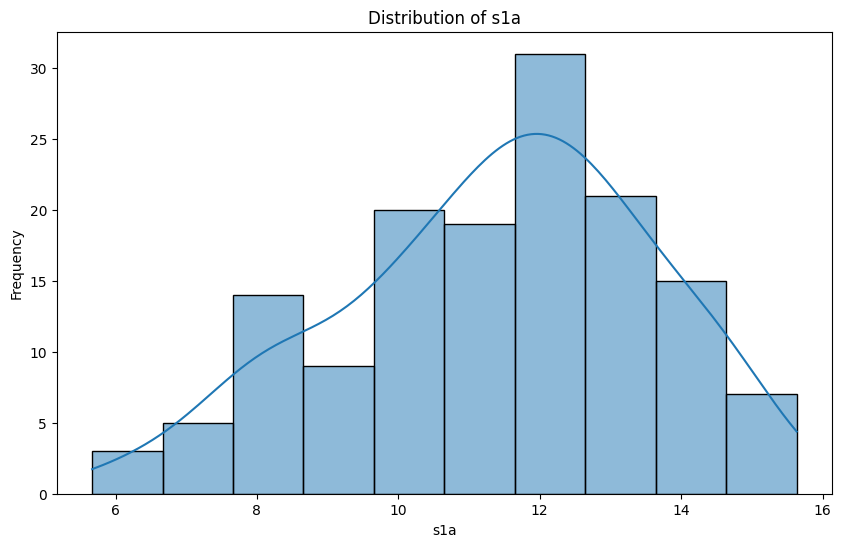


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      13.491519
std        2.798131
min        6.601100
25%       11.833700
50%       13.463150
75%       15.230300
max       20.417000
Name: s1x, dtype: float64


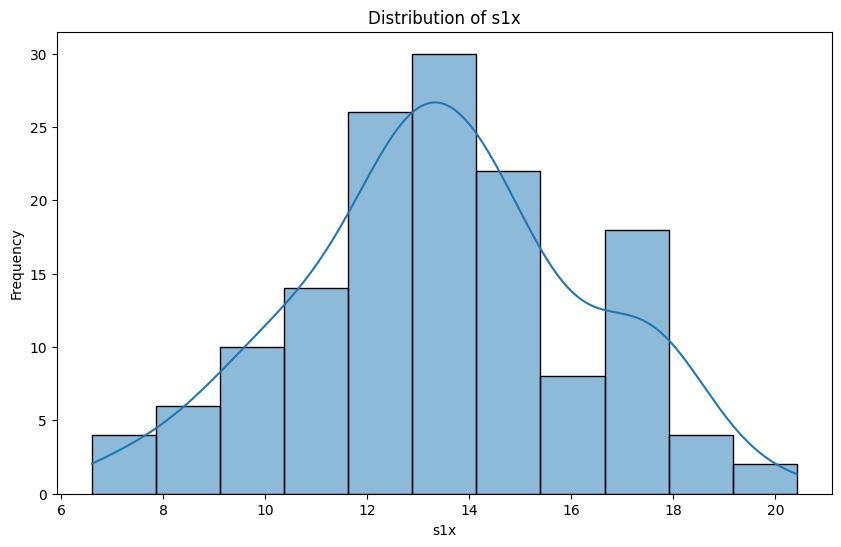


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       8.995550
std        1.698339
min        4.306100
25%        8.024000
50%        9.171500
75%       10.227200
max       12.430400
Name: s1i, dtype: float64


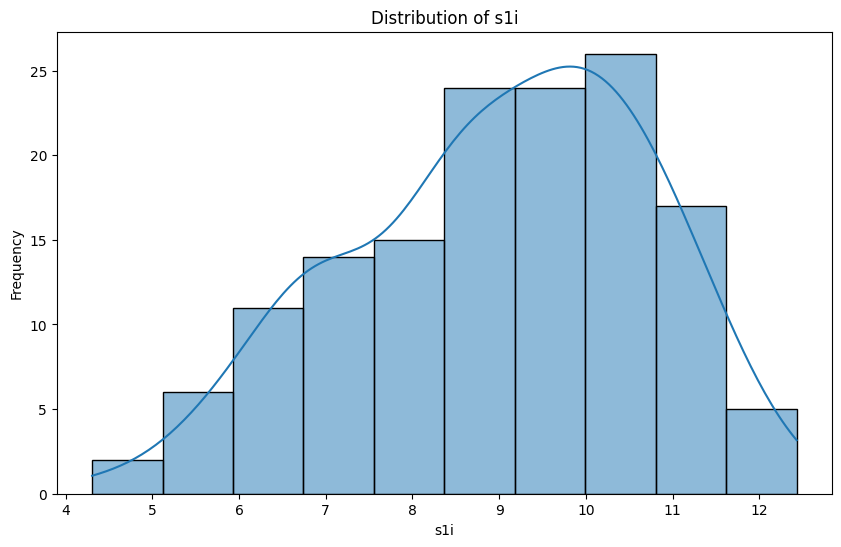


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.828559
std        0.405596
min        0.133110
25%        0.487687
50%        0.780300
75%        1.125698
max        2.033370
Name: s1s, dtype: float64


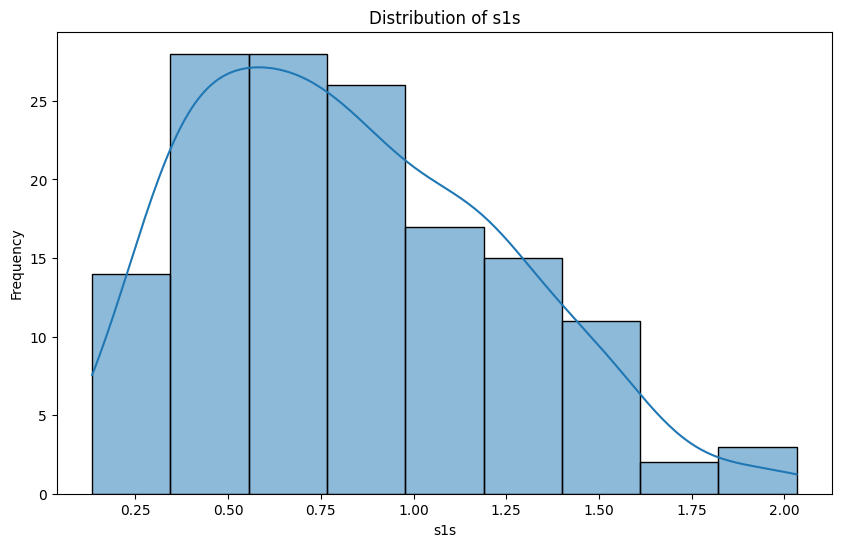


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean      11.320628
std        2.197110
min        5.590300
25%        9.902605
50%       11.552710
75%       12.730045
max       15.628630
Name: s2a, dtype: float64


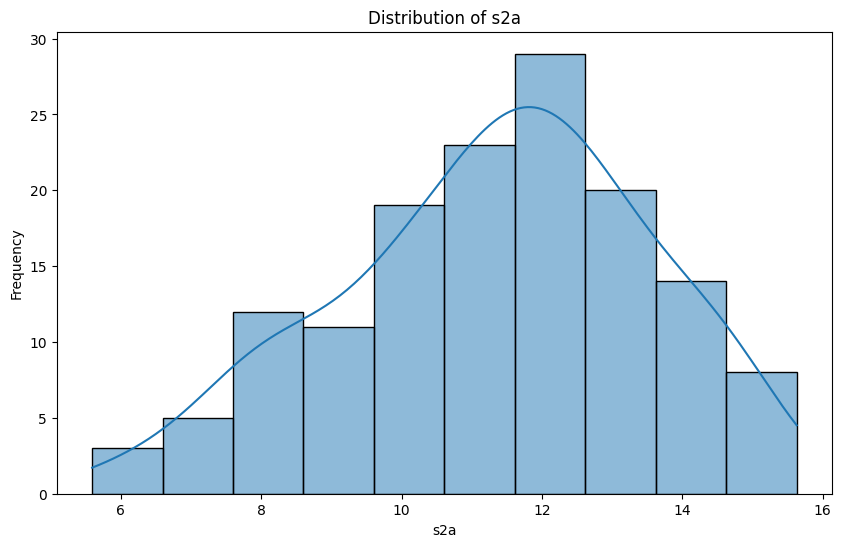


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      13.453544
std        2.835409
min        6.508300
25%       11.729425
50%       13.370350
75%       15.137500
max       20.875000
Name: s2x, dtype: float64


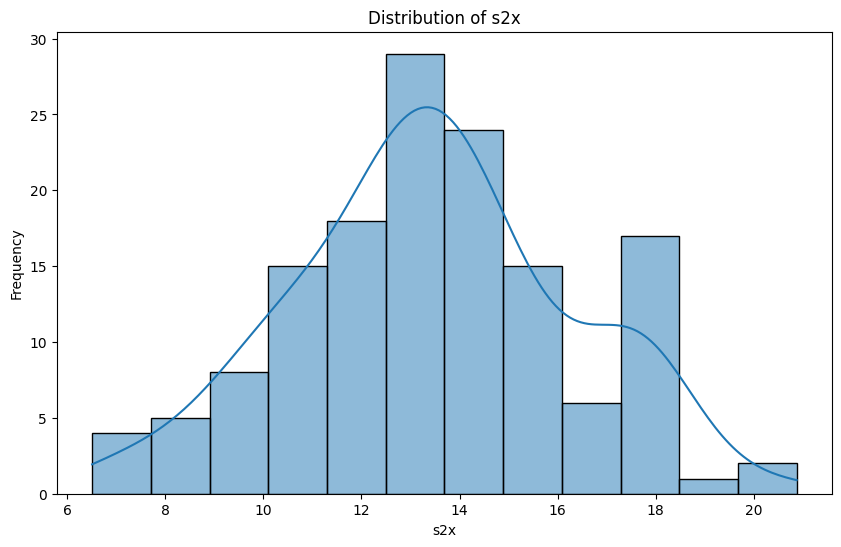


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       8.971600
std        1.714338
min        4.213300
25%        7.747600
50%        9.262300
75%       10.237675
max       12.567100
Name: s2i, dtype: float64


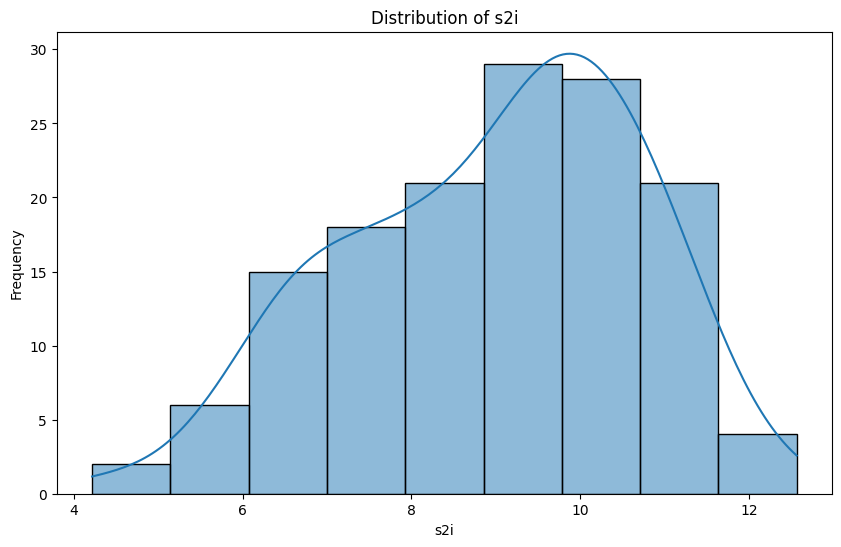


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.824383
std        0.401727
min        0.156060
25%        0.486540
50%        0.787185
75%        1.113075
max        2.033370
Name: s2s, dtype: float64


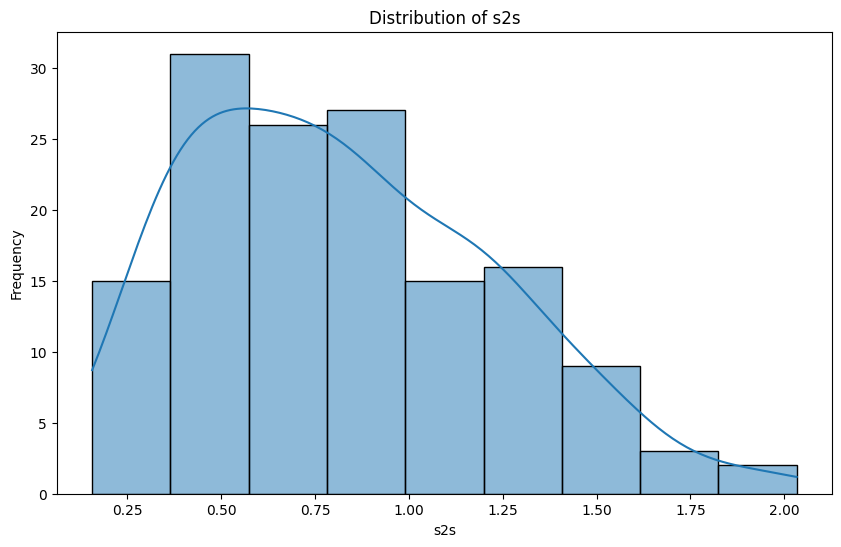


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean      10.684100
std        2.358922
min        4.837520
25%        9.169940
50%       10.777690
75%       12.159520
max       15.327990
Name: s3a, dtype: float64


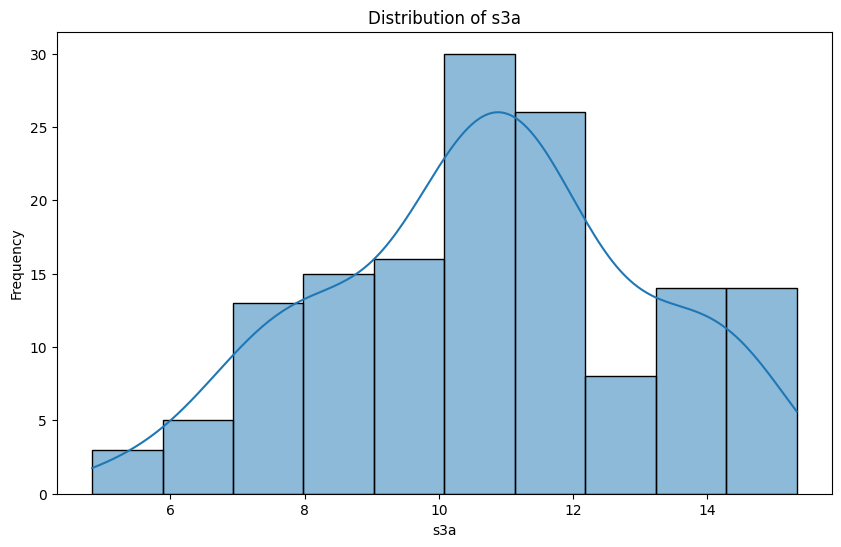


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      12.877386
std        3.073818
min        5.819140
25%       10.933645
50%       12.883120
75%       14.626180
max       20.405800
Name: s3x, dtype: float64


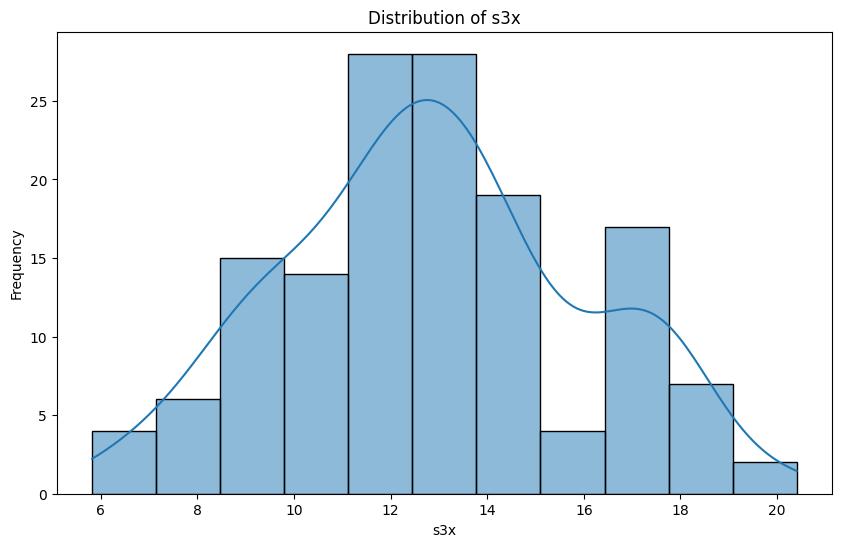


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       8.260443
std        1.643545
min        3.754990
25%        7.103500
50%        8.525470
75%        9.546078
max       11.002450
Name: s3i, dtype: float64


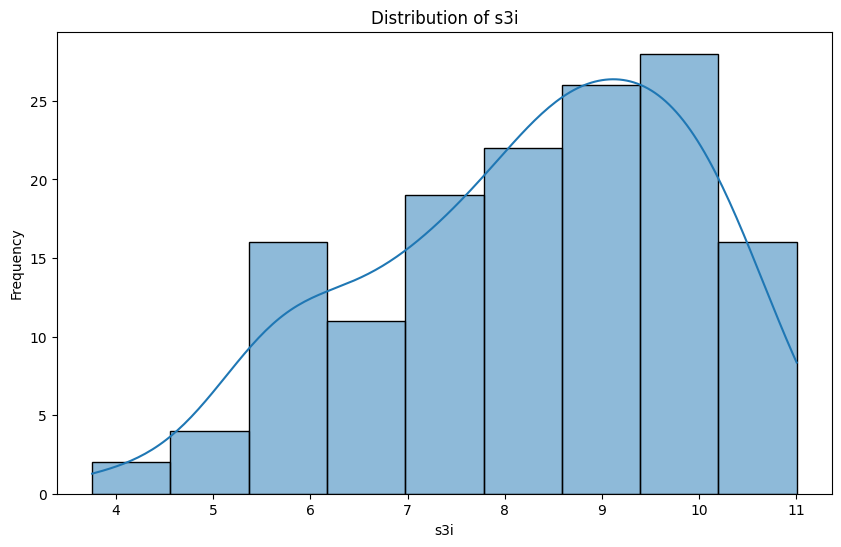


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.852099
std        0.418715
min        0.192650
25%        0.491957
50%        0.798140
75%        1.165100
max        1.977000
Name: s3s, dtype: float64


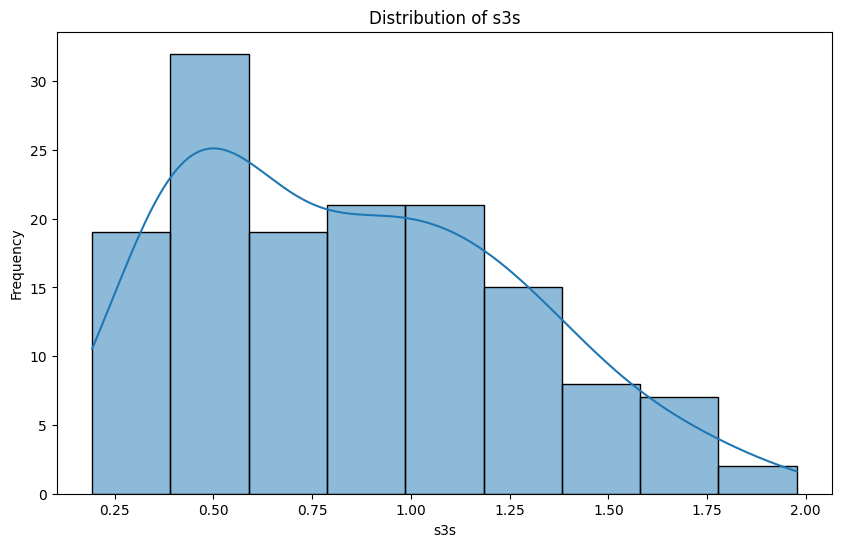


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      79.888889
std       21.623644
min       29.000000
25%       65.000000
50%       85.000000
75%       99.000000
max      110.000000
Name: d1a, dtype: float64


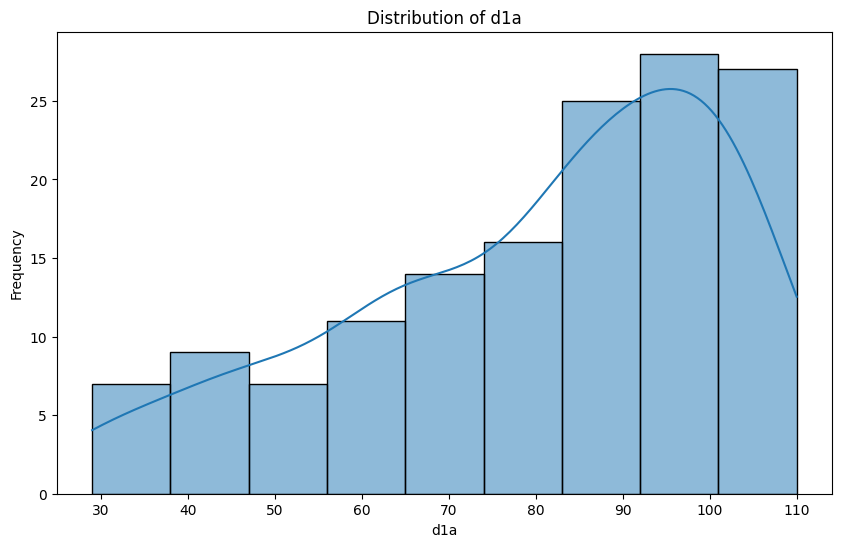


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.194444
std        2.014902
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       12.000000
Name: d1s, dtype: float64


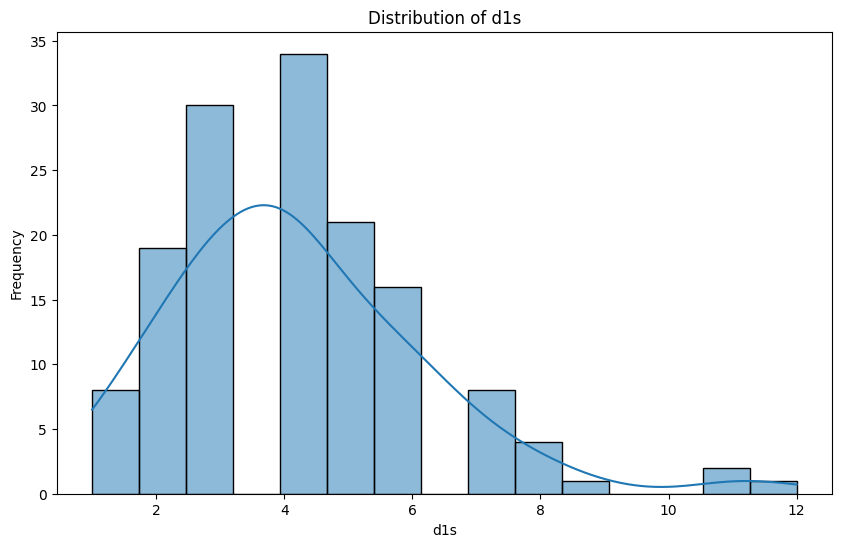


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      79.791667
std       23.651868
min       28.000000
25%       64.750000
50%       85.000000
75%      101.000000
max      112.000000
Name: d2a, dtype: float64


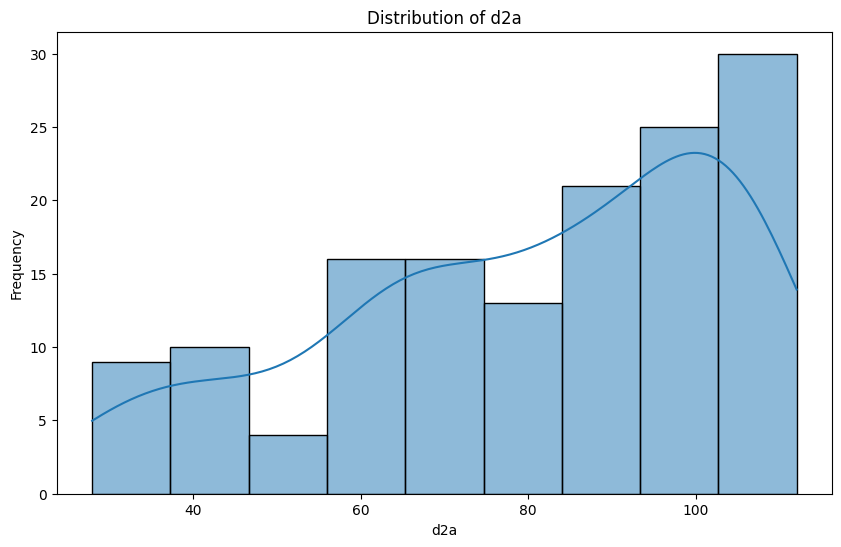


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.020833
std        1.941338
min        2.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       12.000000
Name: d2s, dtype: float64


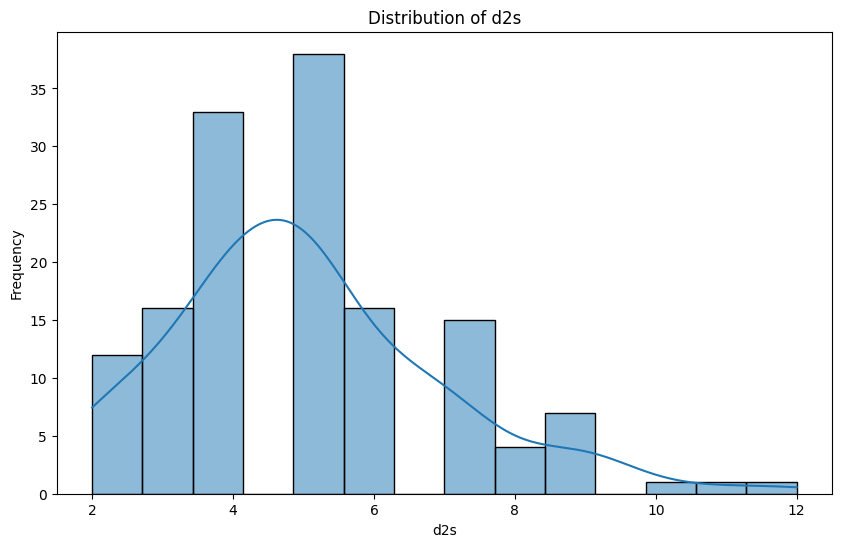


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      67.104167
std       21.123585
min       35.000000
25%       45.750000
50%       66.000000
75%       91.000000
max       97.000000
Name: h1a, dtype: float64


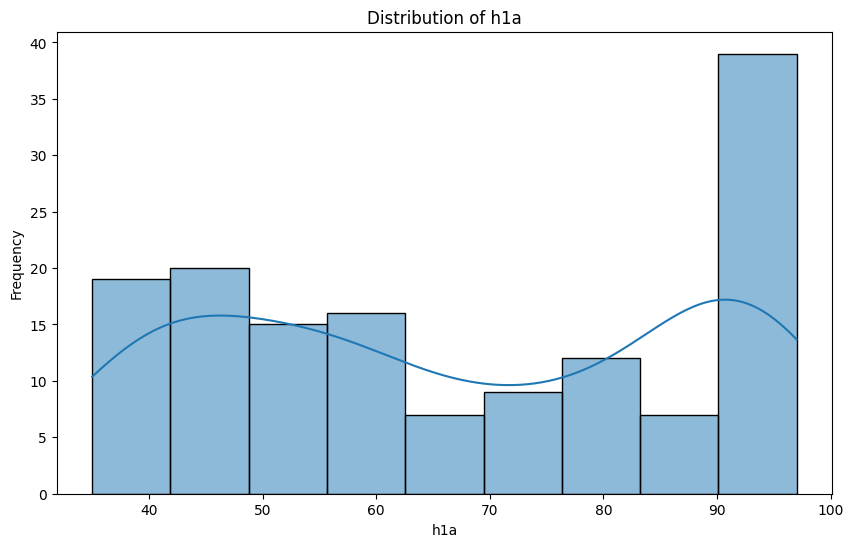


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      68.250000
std       20.944649
min       36.000000
25%       47.750000
50%       67.500000
75%       92.000000
max       98.000000
Name: h1x, dtype: float64


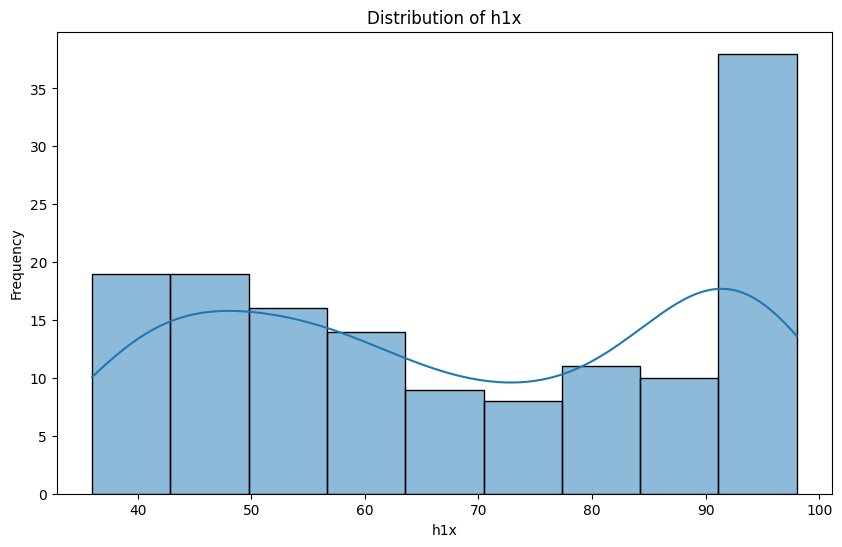


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      66.055556
std       21.332131
min       33.000000
25%       44.000000
50%       65.000000
75%       90.000000
max       97.000000
Name: h1i, dtype: float64


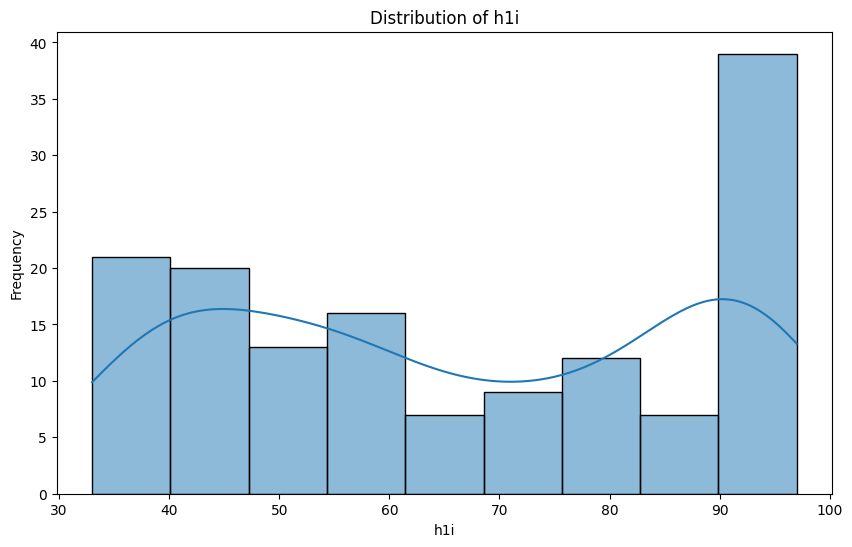


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       7.621528
std        1.770412
min        4.750000
25%        6.150000
50%        7.350000
75%        9.150000
max       10.950000
Name: t1a, dtype: float64


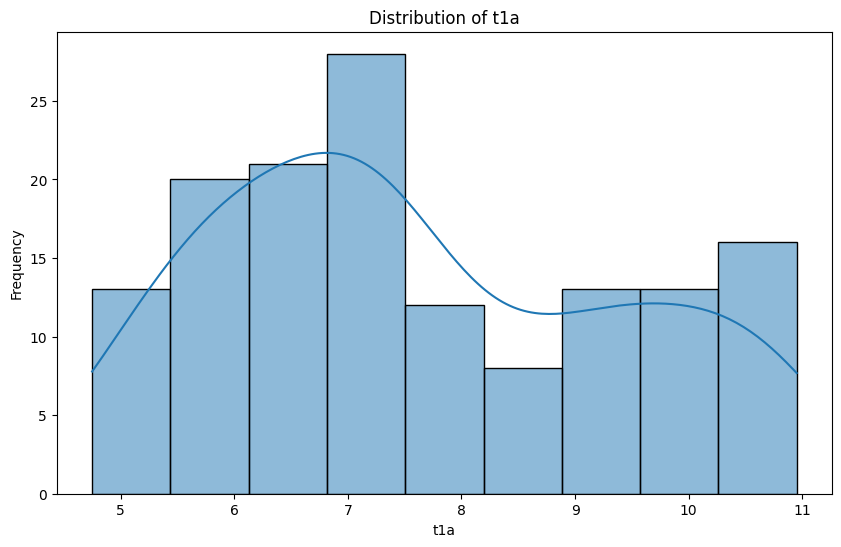


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       7.734028
std        1.776209
min        4.850000
25%        6.250000
50%        7.450000
75%        9.300000
max       11.150000
Name: t1x, dtype: float64


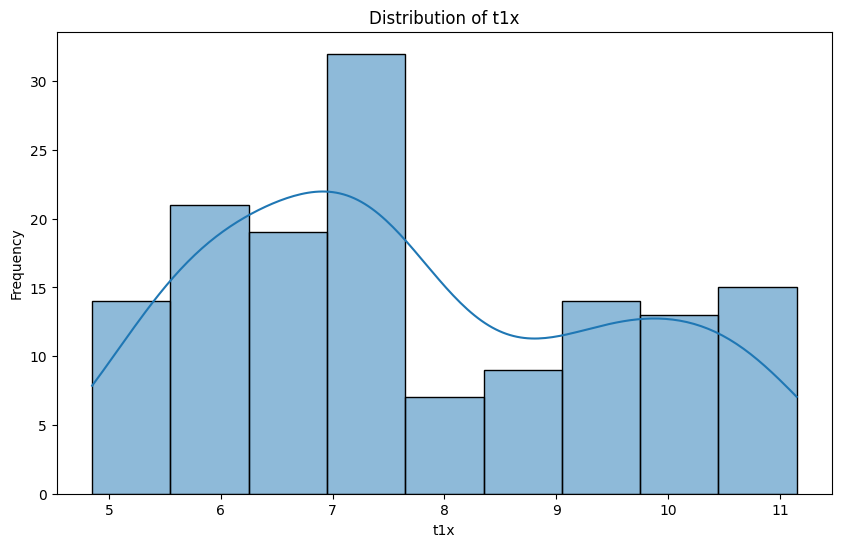


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       7.509722
std        1.775841
min        4.550000
25%        6.150000
50%        7.150000
75%        9.050000
max       10.850000
Name: t1i, dtype: float64


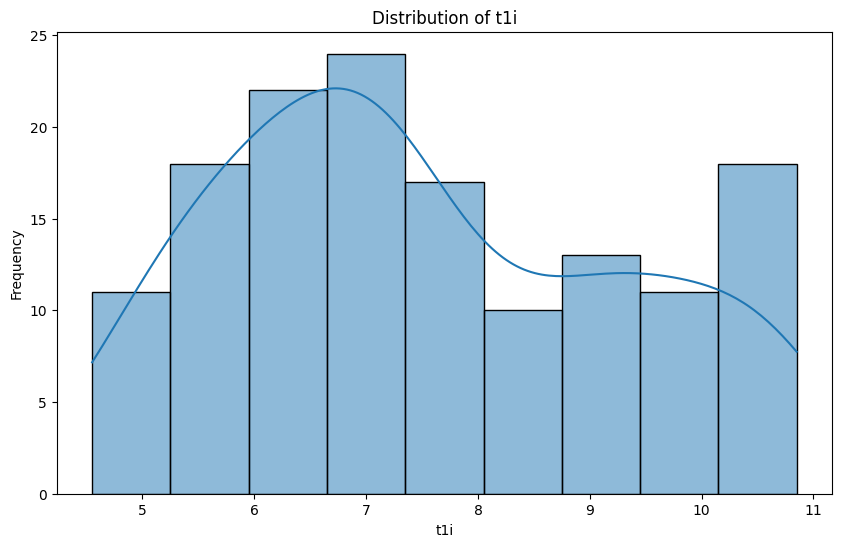


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1007.715278
std         4.553740
min      1000.000000
25%      1003.000000
50%      1009.000000
75%      1012.000000
max      1014.000000
Name: b1a, dtype: float64


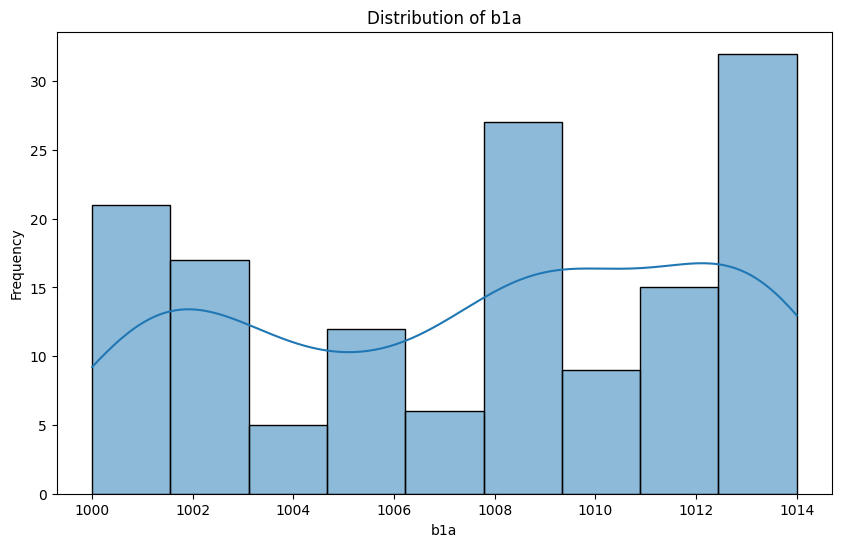


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1008.125000
std         4.492223
min      1000.000000
25%      1003.750000
50%      1009.000000
75%      1013.000000
max      1014.000000
Name: b1x, dtype: float64


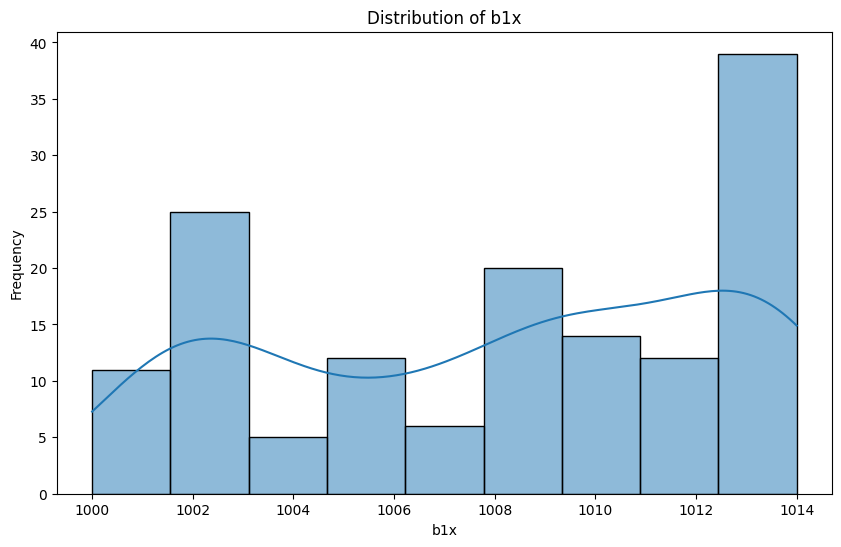


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1007.312500
std         4.450927
min      1000.000000
25%      1003.000000
50%      1008.000000
75%      1012.000000
max      1013.000000
Name: b1i, dtype: float64


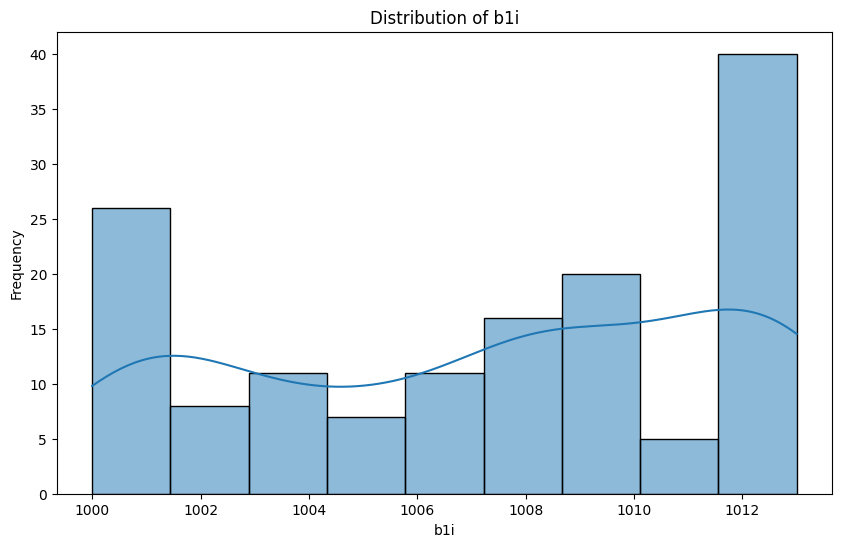


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       9.591241
std        2.658812
min        3.964780
25%        7.463130
50%        9.475945
75%       11.204490
max       14.803720
Name: p1a, dtype: float64


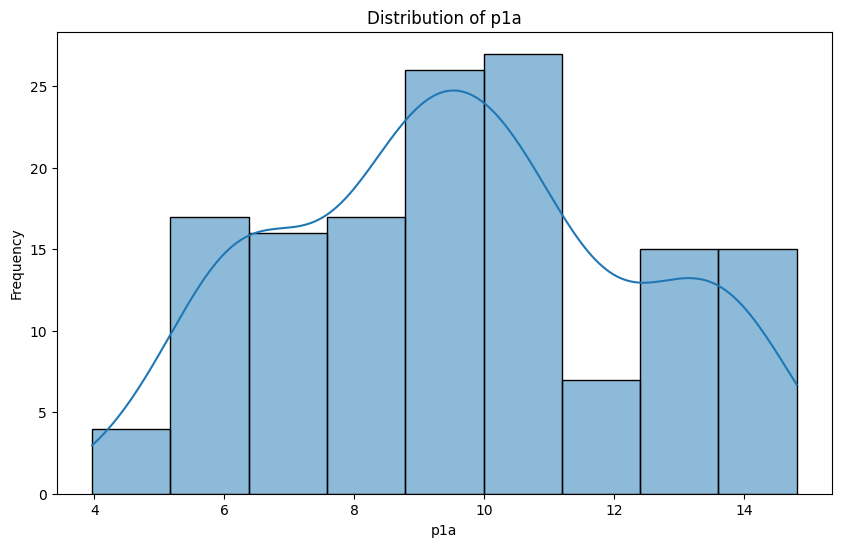


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      11.896507
std        3.585644
min        4.858850
25%        8.985350
50%       11.736350
75%       13.948613
max       19.347450
Name: p1x, dtype: float64


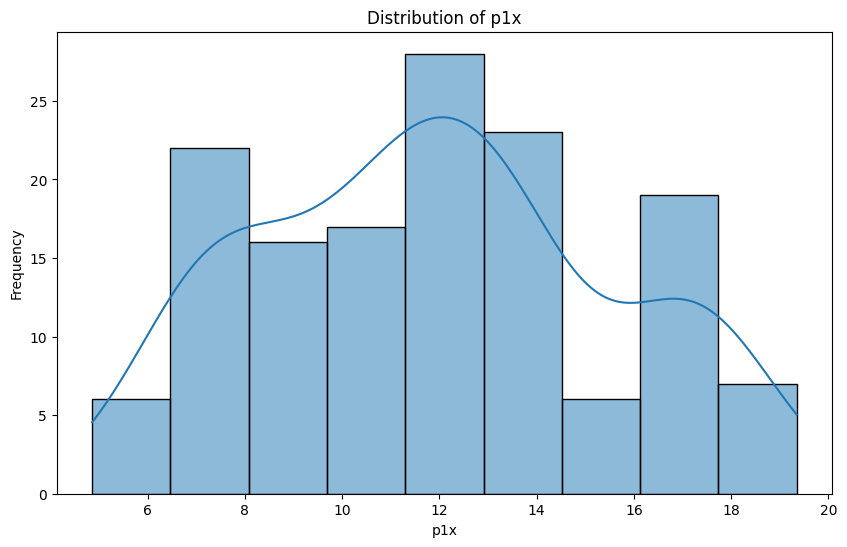


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       7.151350
std        1.621106
min        3.208250
25%        5.890475
50%        7.197200
75%        8.354913
max       10.590100
Name: p1i, dtype: float64


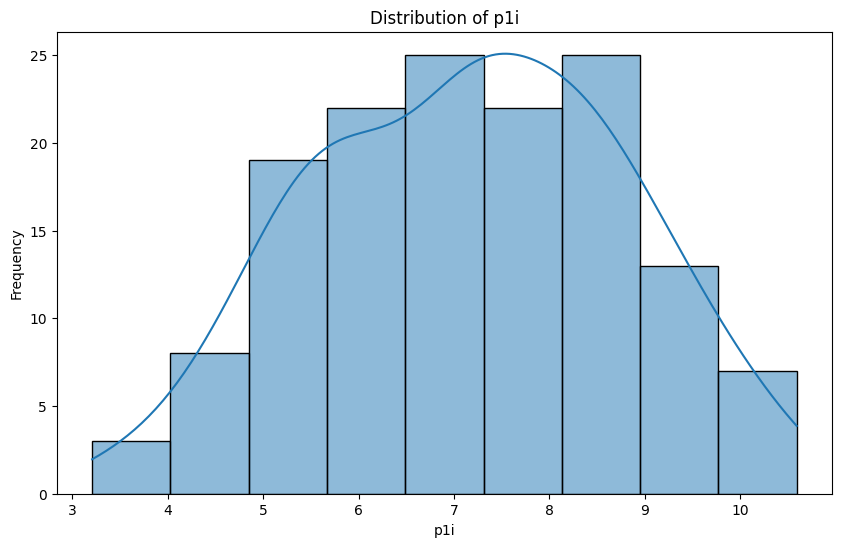


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.880673
std        0.447095
min        0.178820
25%        0.476840
50%        0.841350
75%        1.211588
max        2.040330
Name: p1s, dtype: float64


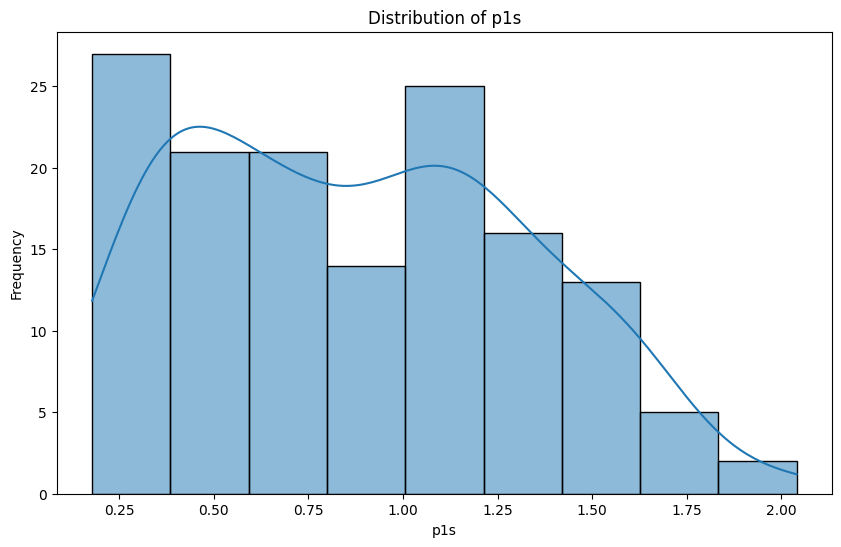


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      48.229167
std        3.515637
min       42.000000
25%       46.000000
50%       48.000000
75%       52.000000
max       53.000000
Name: tia, dtype: float64


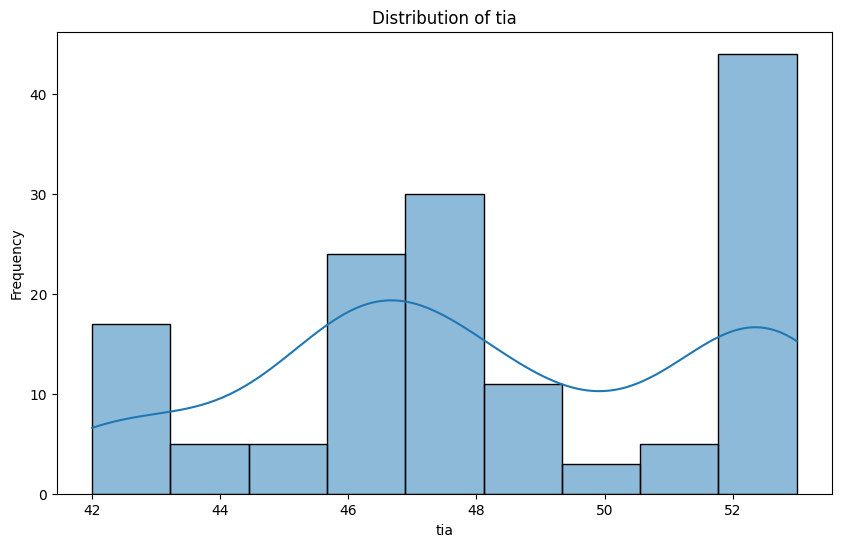


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      48.284722
std        3.517515
min       42.000000
25%       46.000000
50%       48.000000
75%       52.000000
max       53.000000
Name: tix, dtype: float64


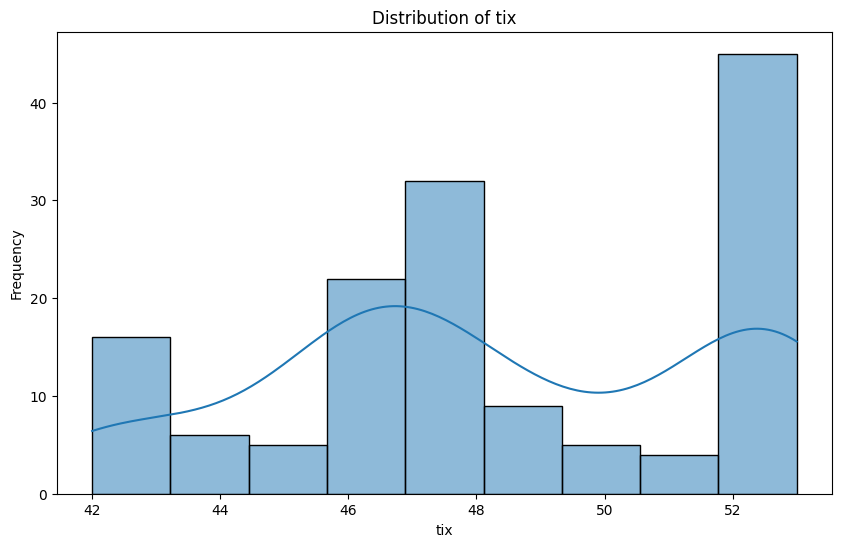


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      48.138889
std        3.501470
min       42.000000
25%       46.000000
50%       47.500000
75%       52.000000
max       53.000000
Name: tii, dtype: float64


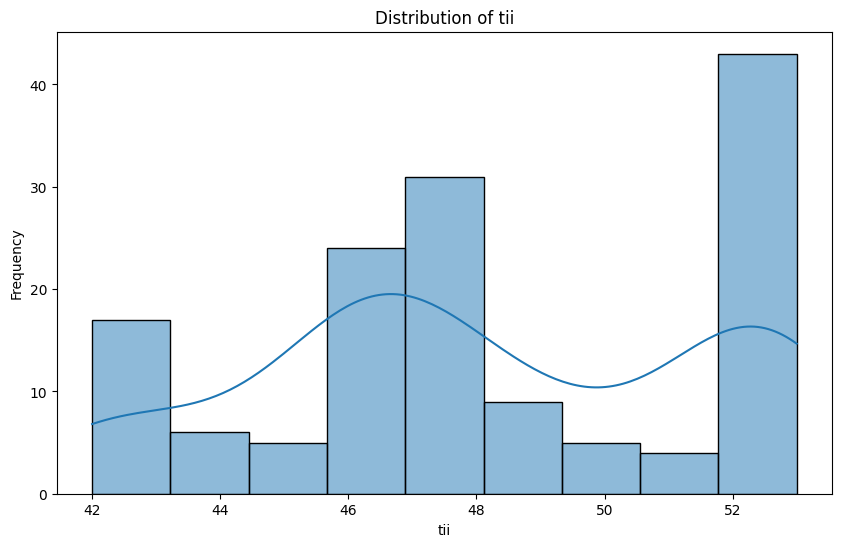


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.611111
std        5.066151
min      125.000000
25%      126.000000
50%      128.000000
75%      136.000000
max      138.000000
Name: vxa, dtype: float64


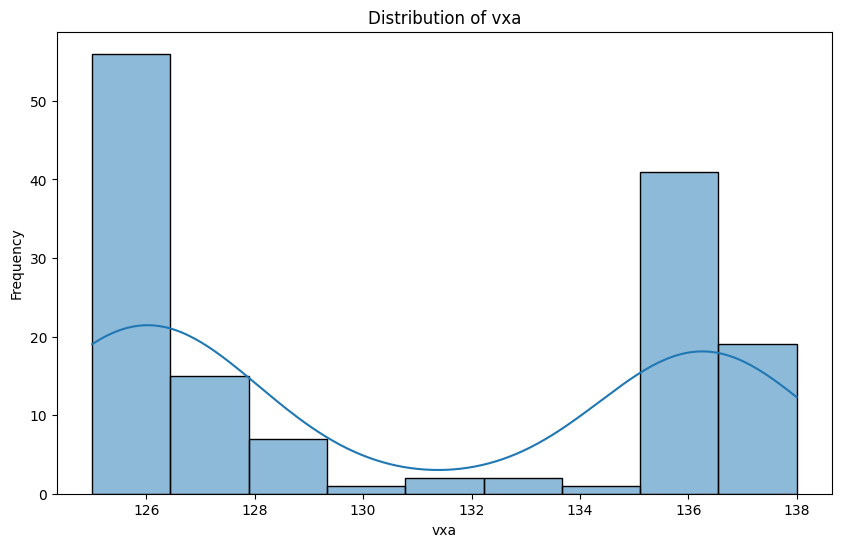


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.138889
std        5.522505
min      125.000000
25%      126.000000
50%      128.000000
75%      137.000000
max      140.000000
Name: vxx, dtype: float64


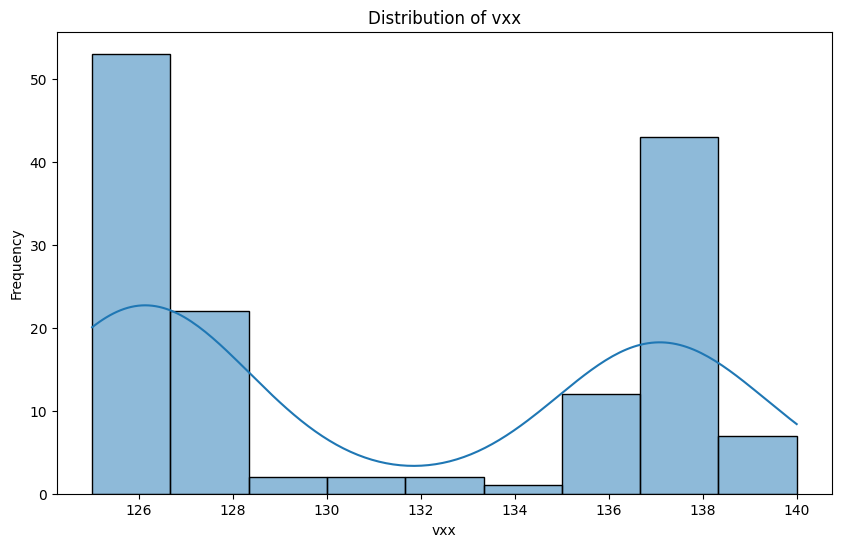


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.347222
std        4.912264
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      137.000000
Name: vxi, dtype: float64


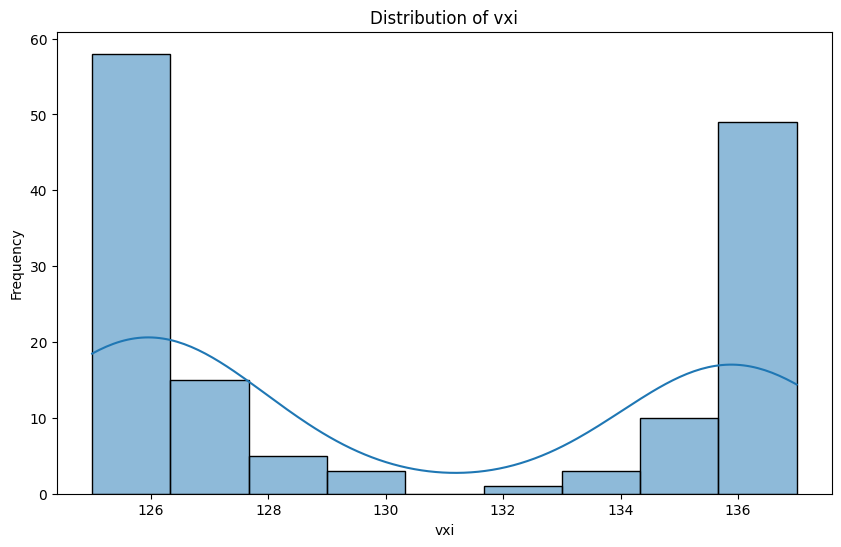


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


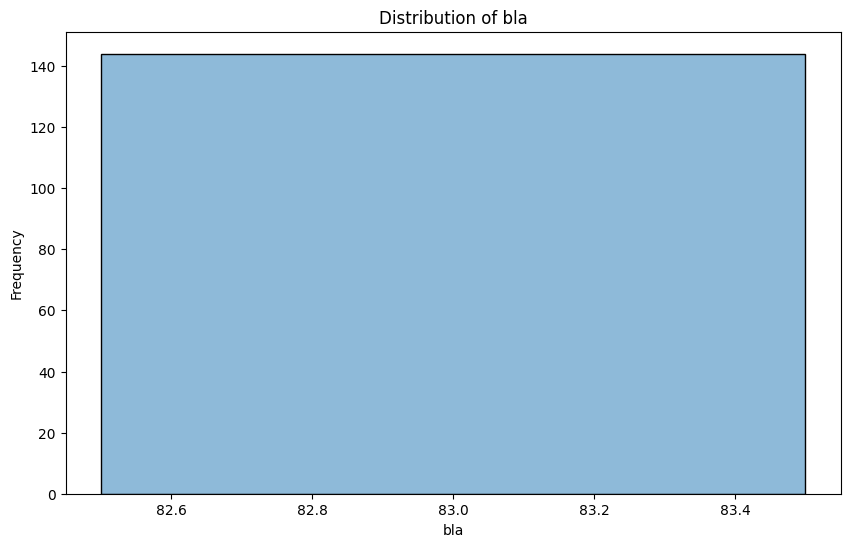


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


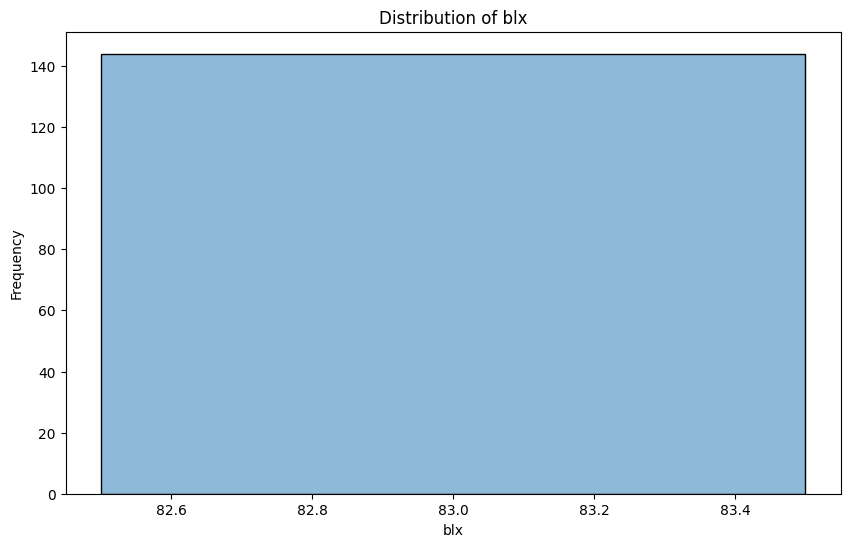


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.930556
std        0.255096
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


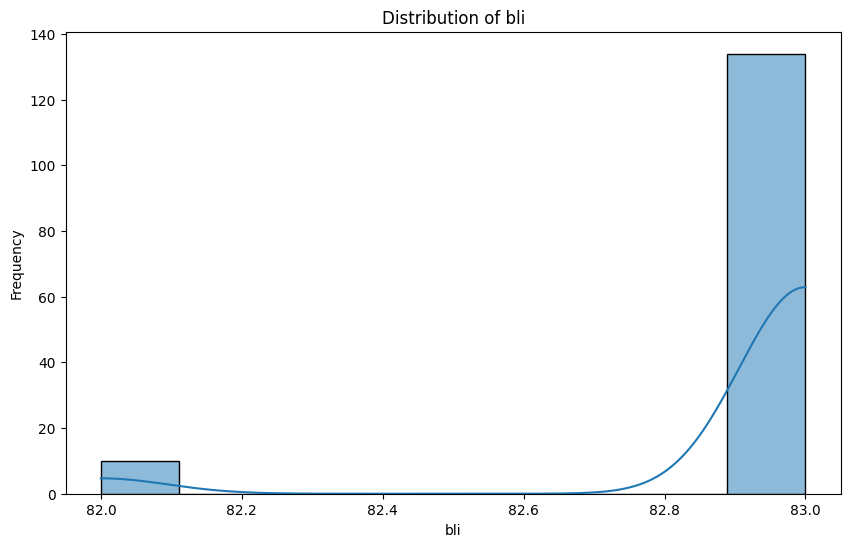


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


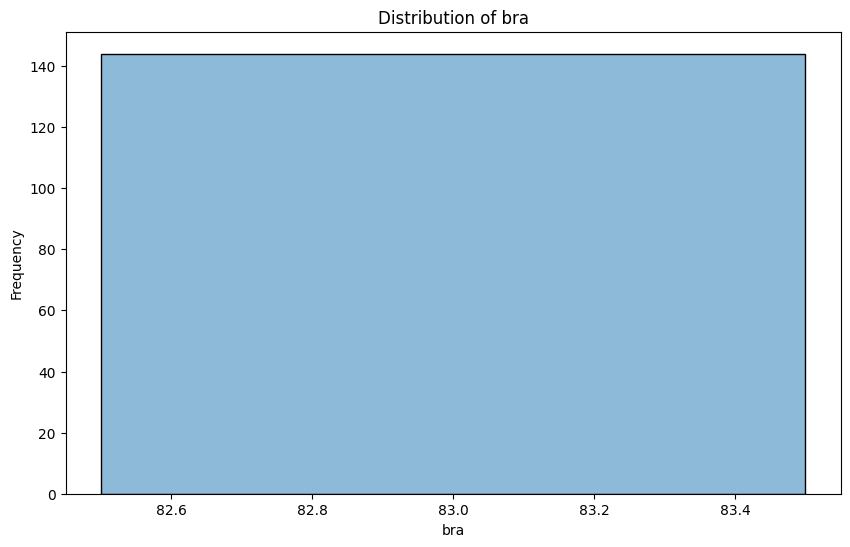


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


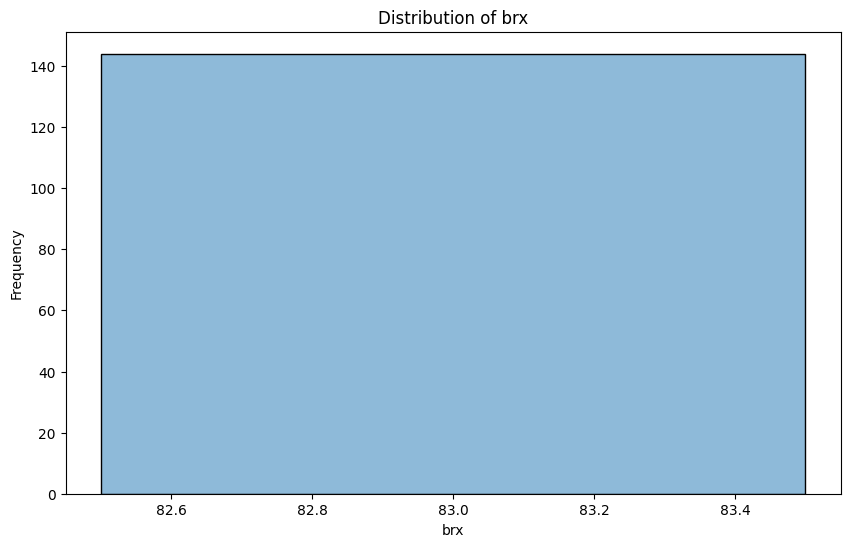


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


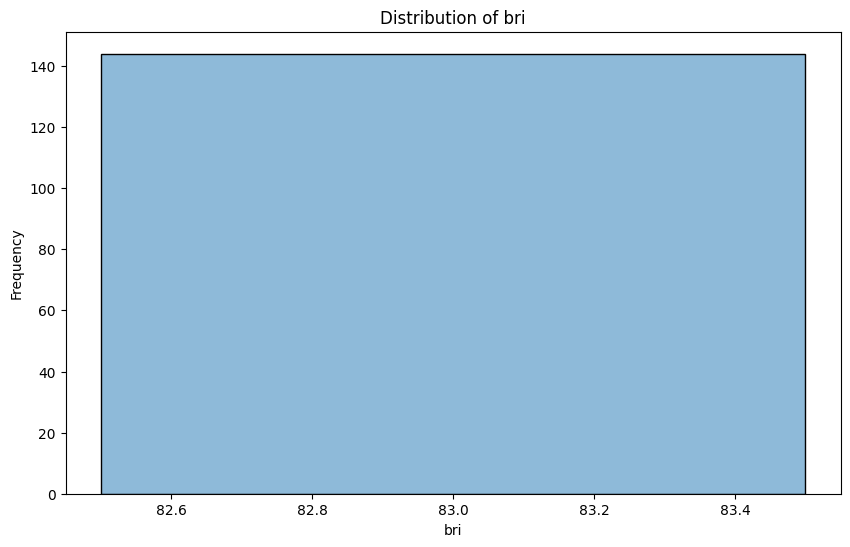

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

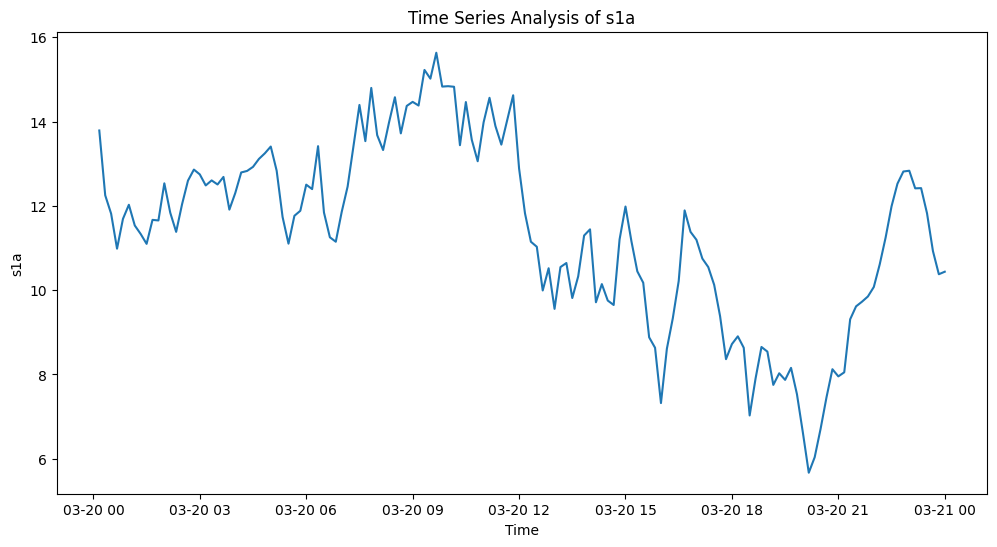

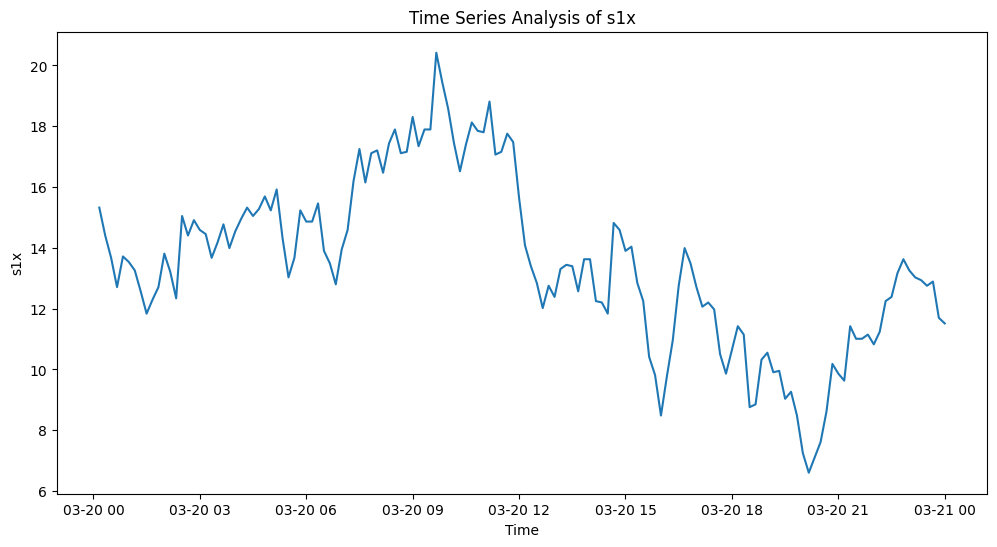

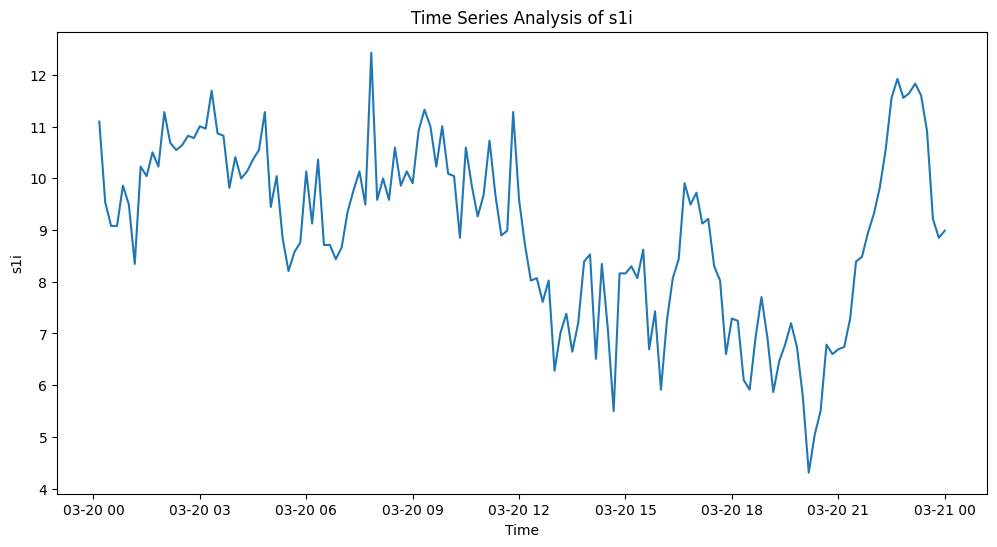

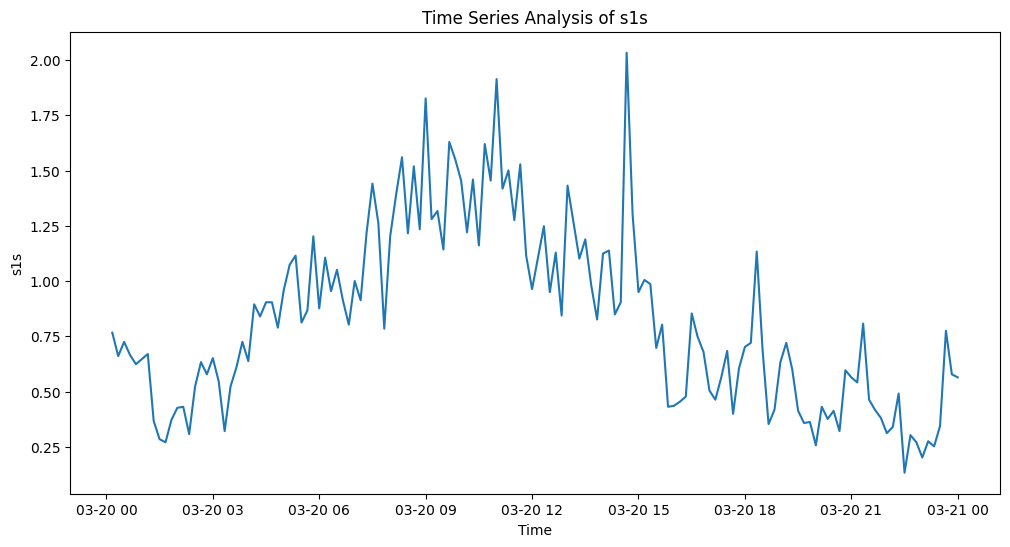

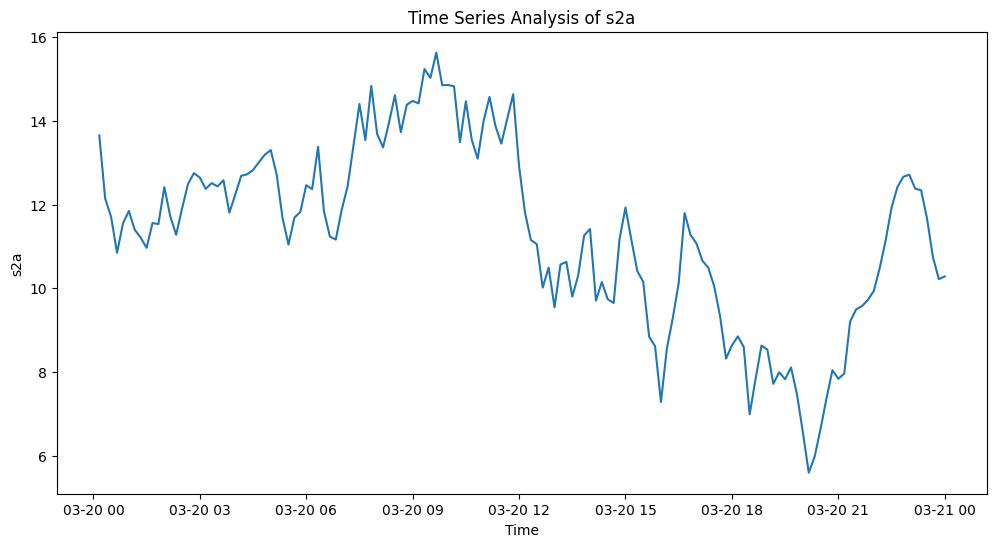

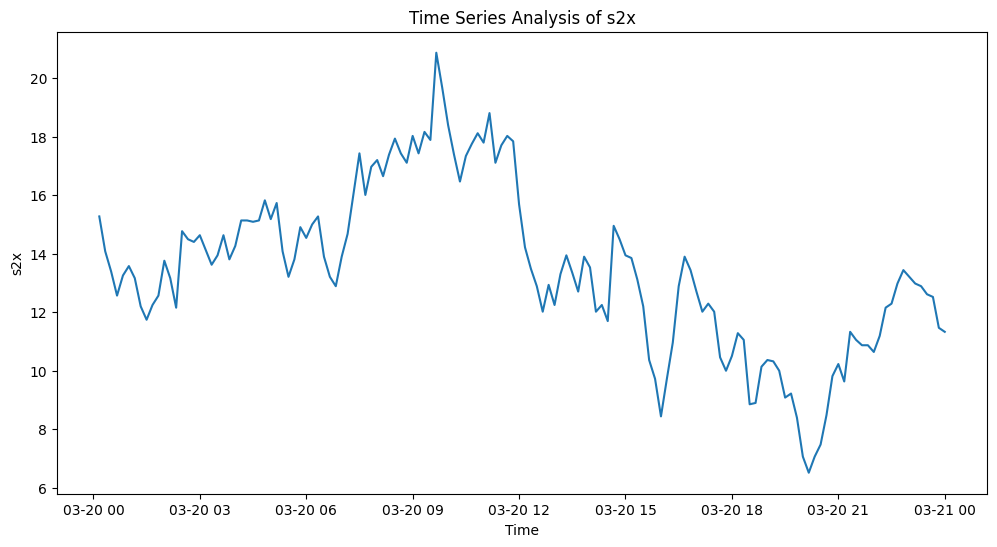

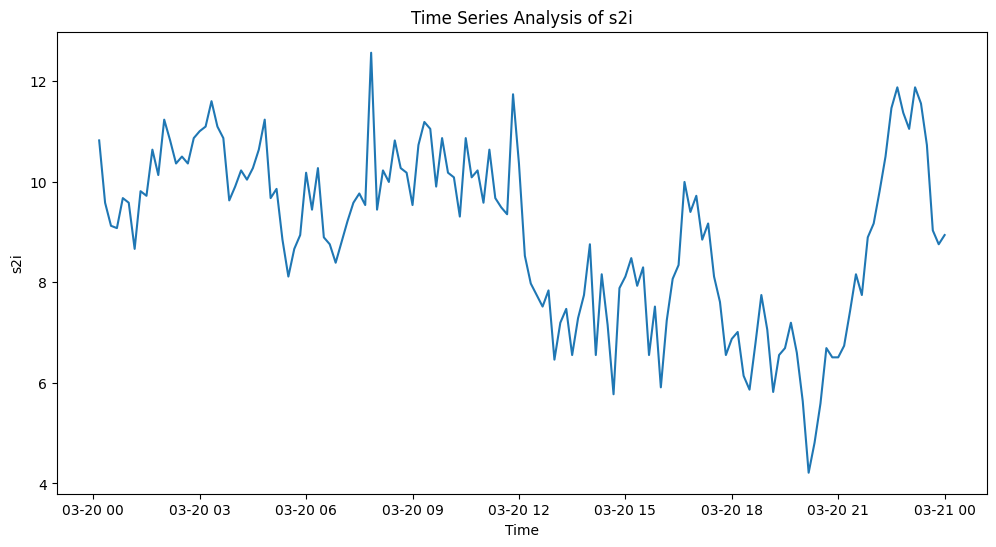

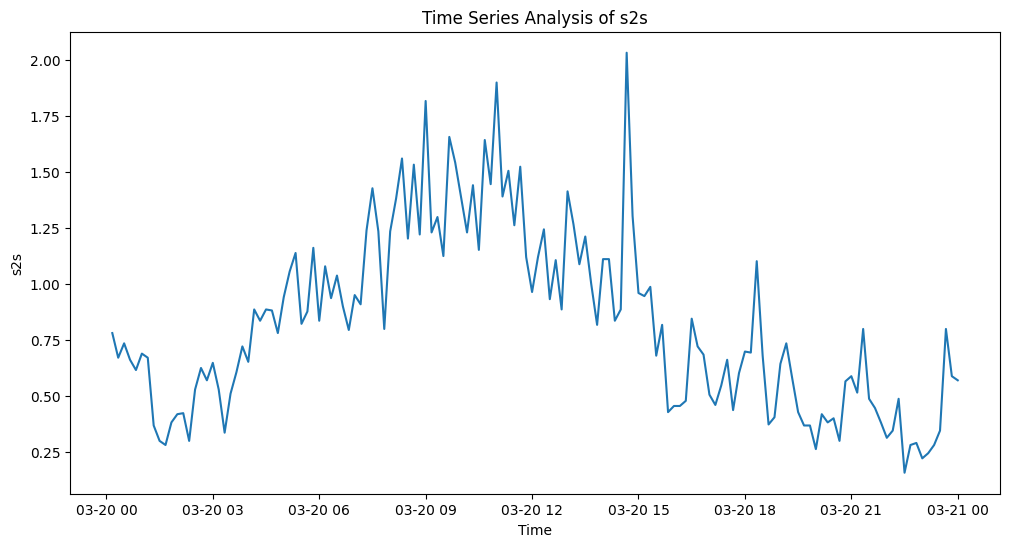

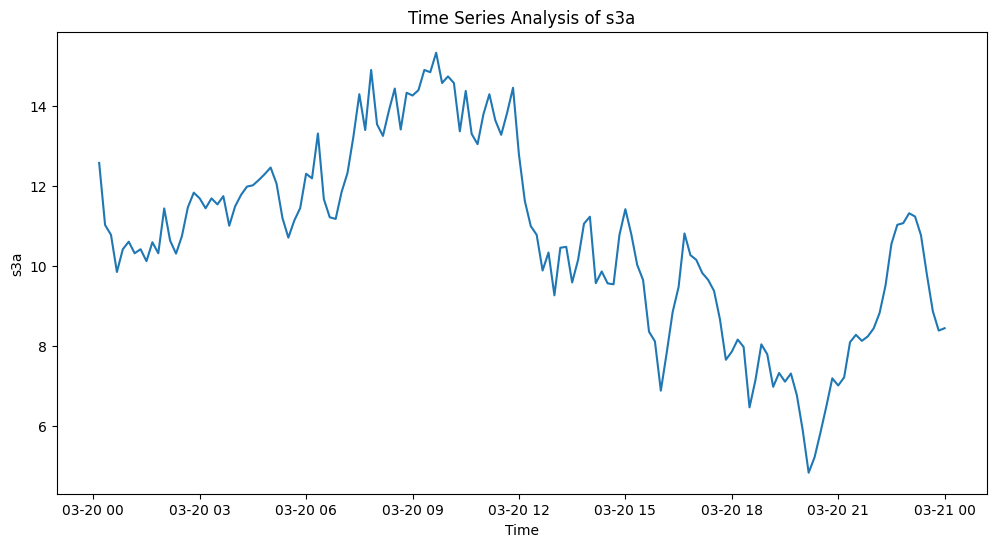

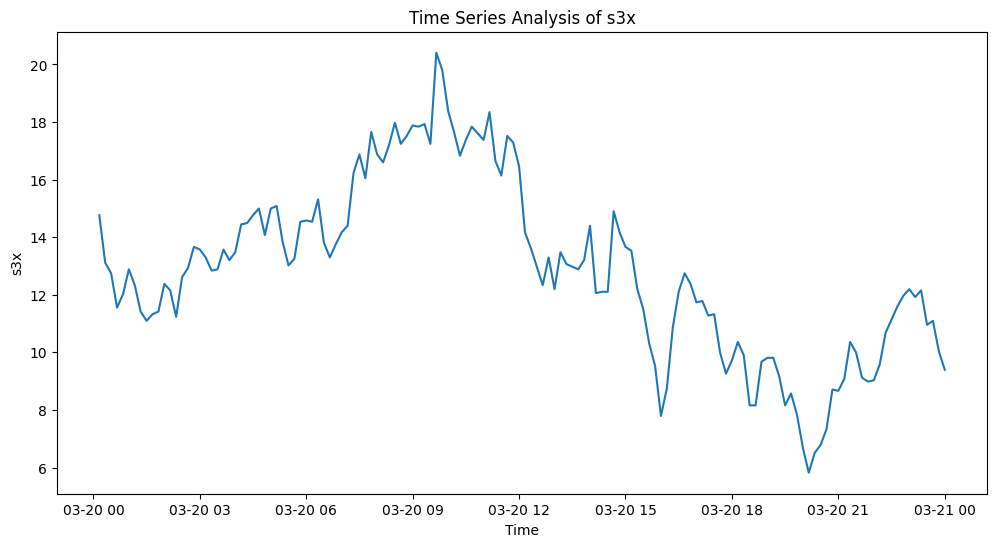

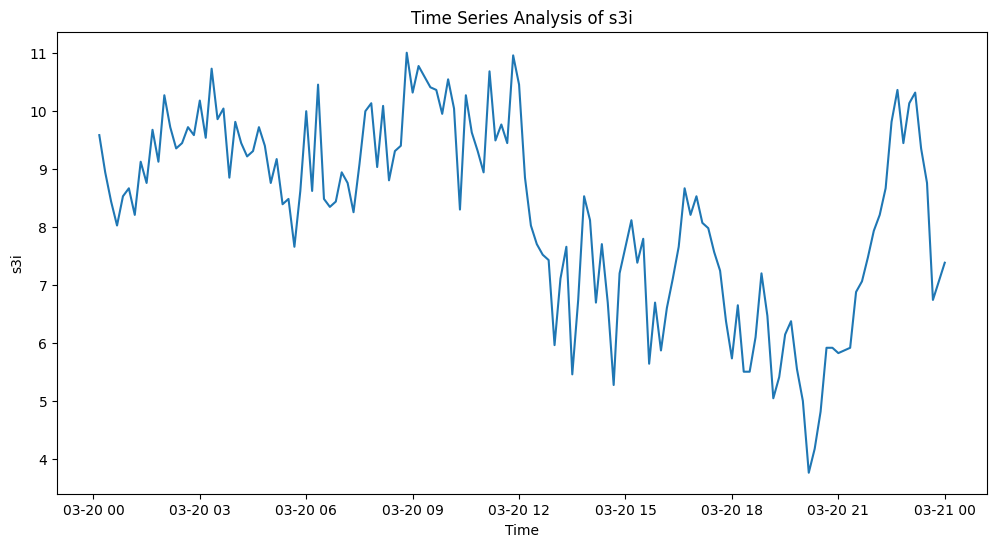

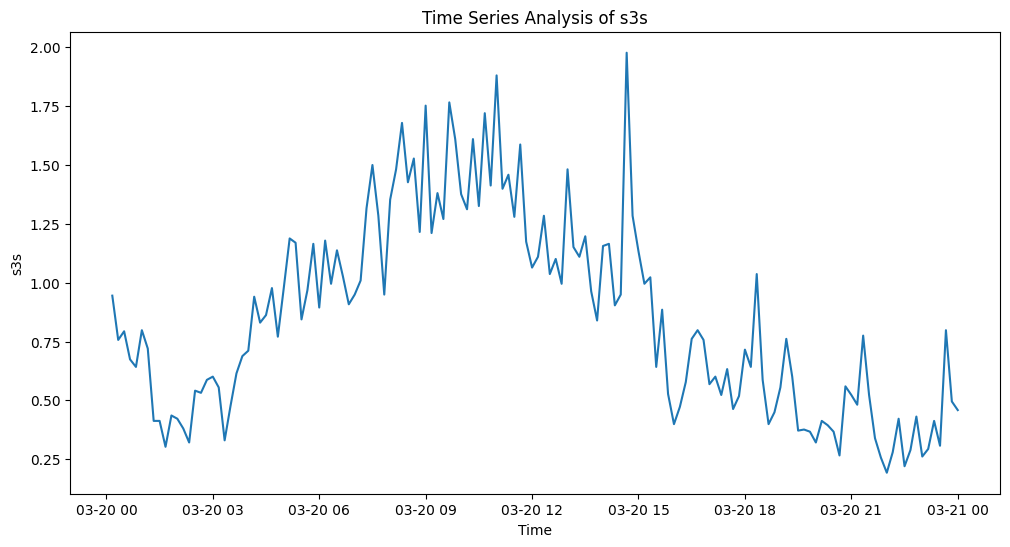

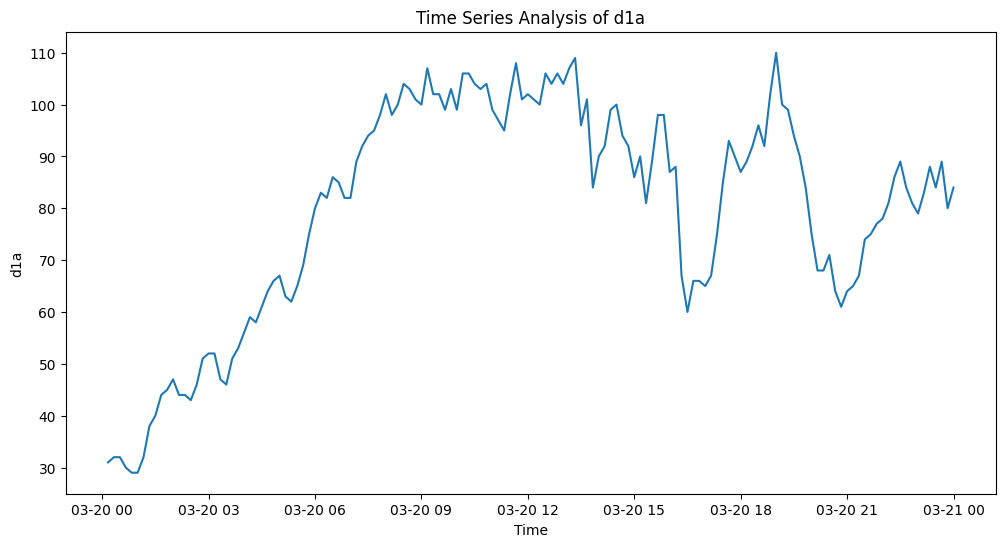

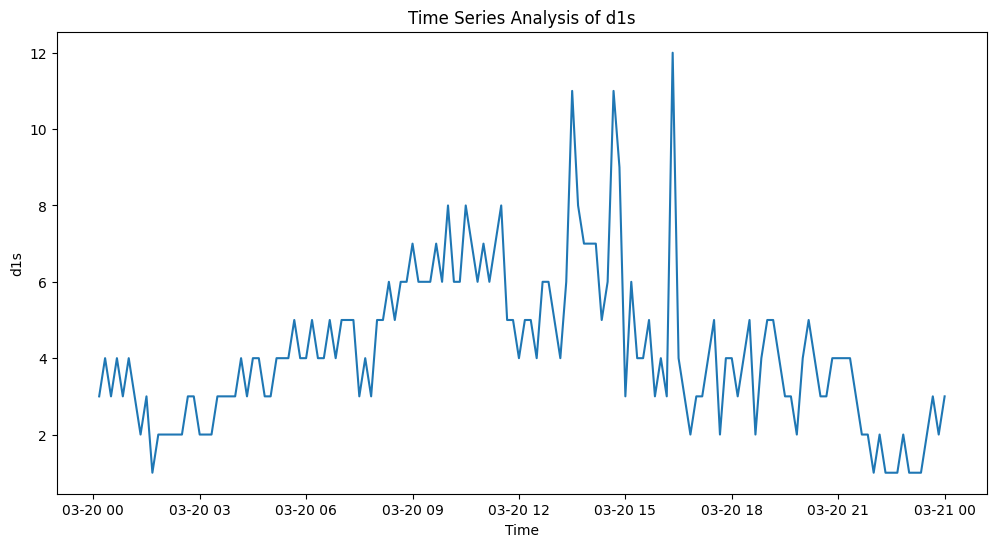

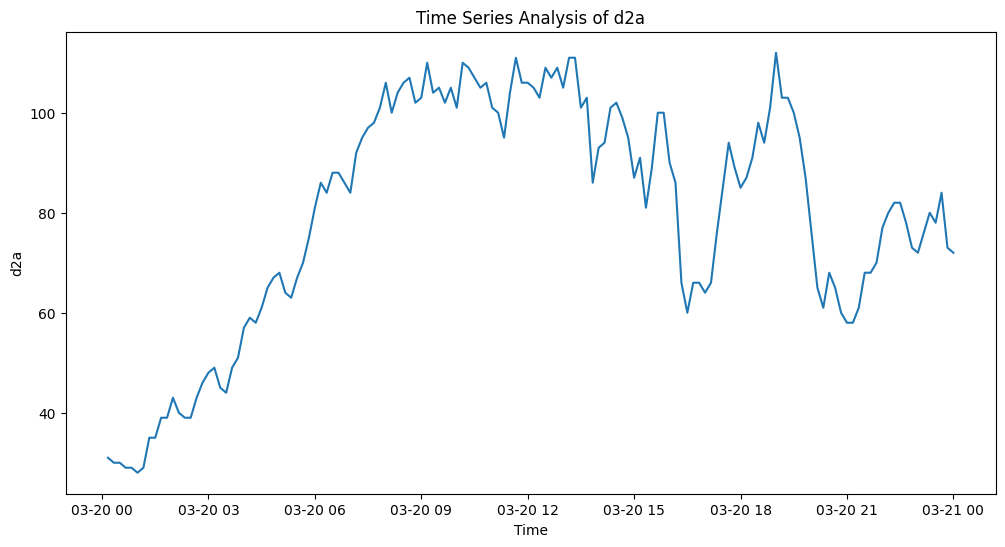

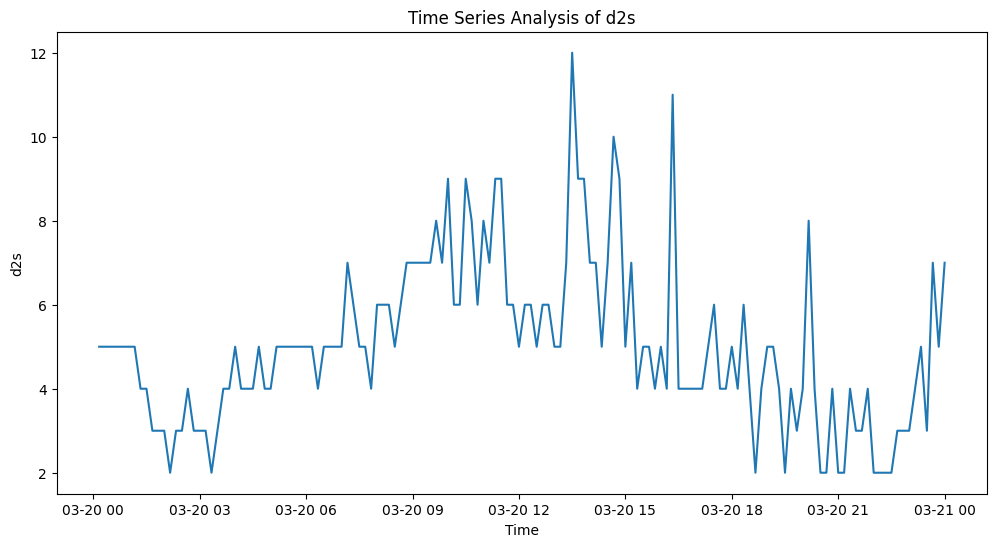

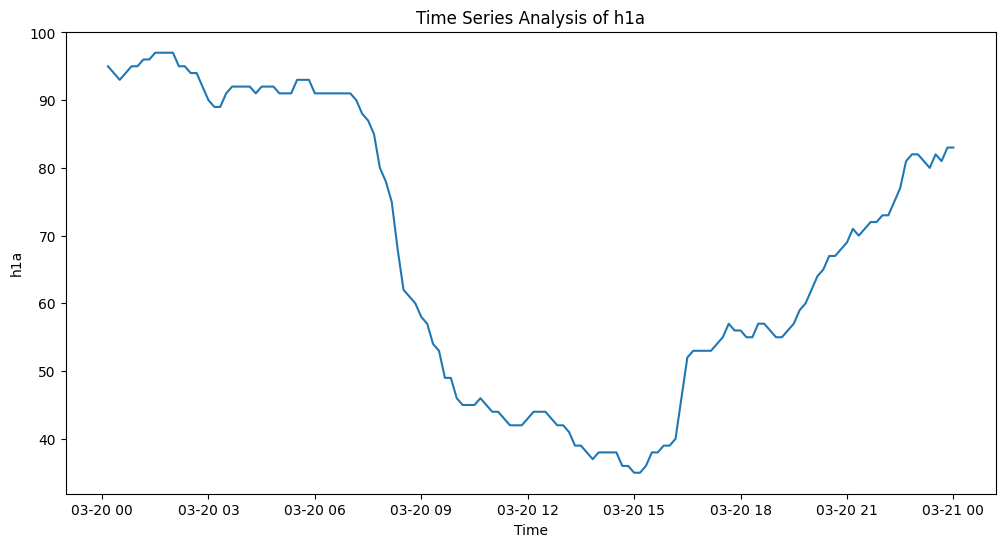

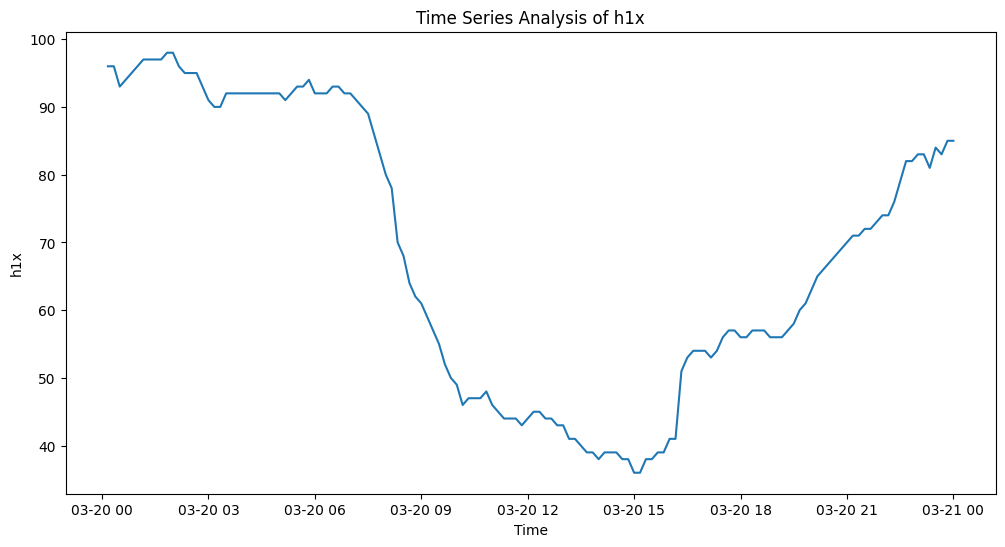

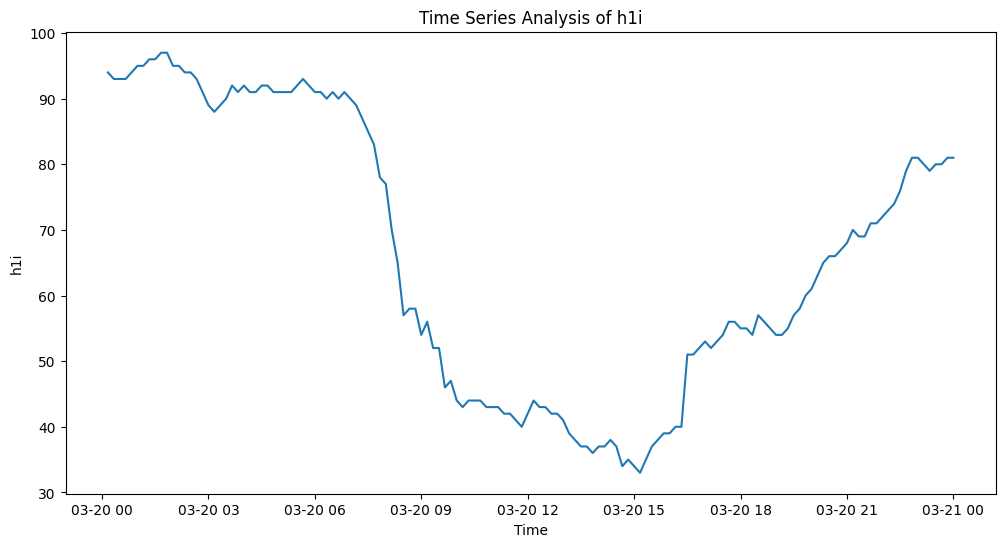

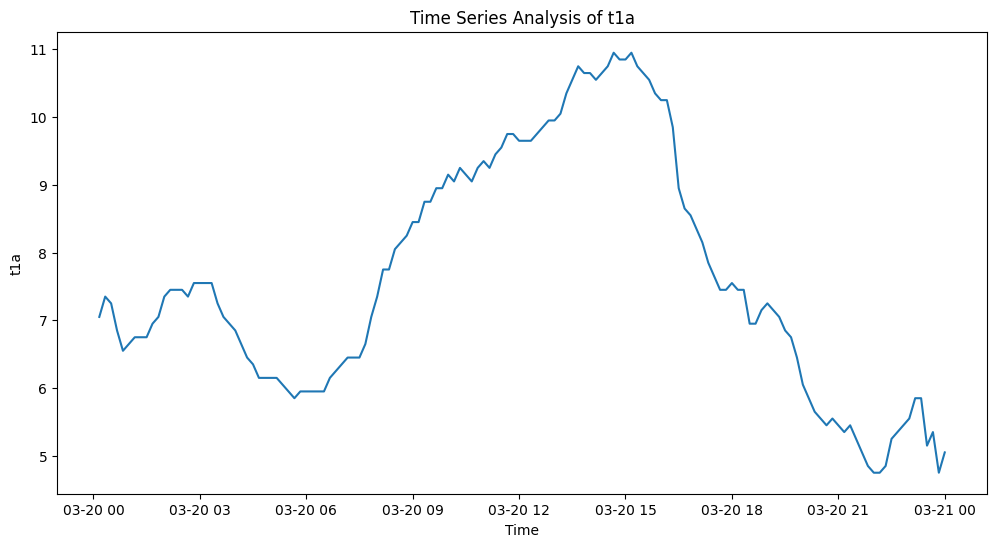

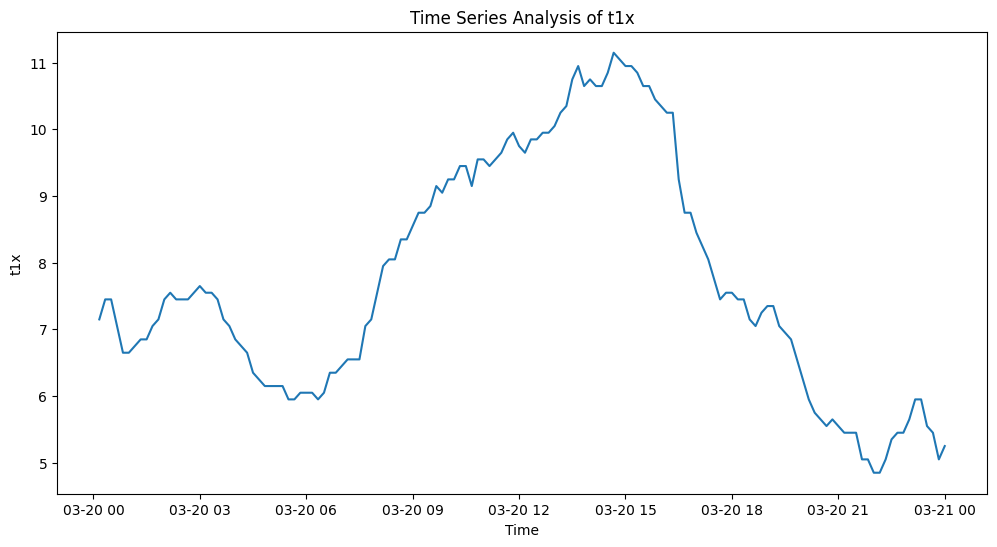

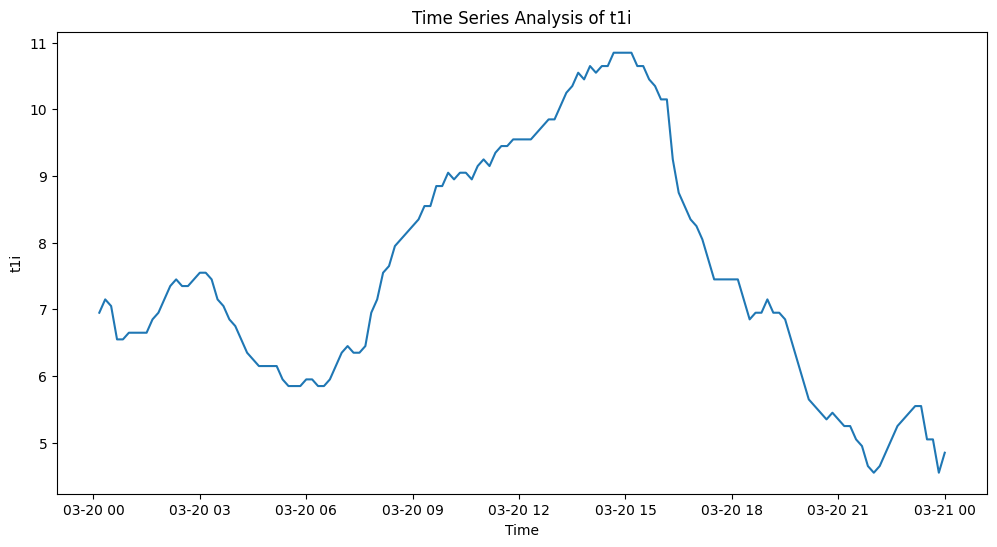

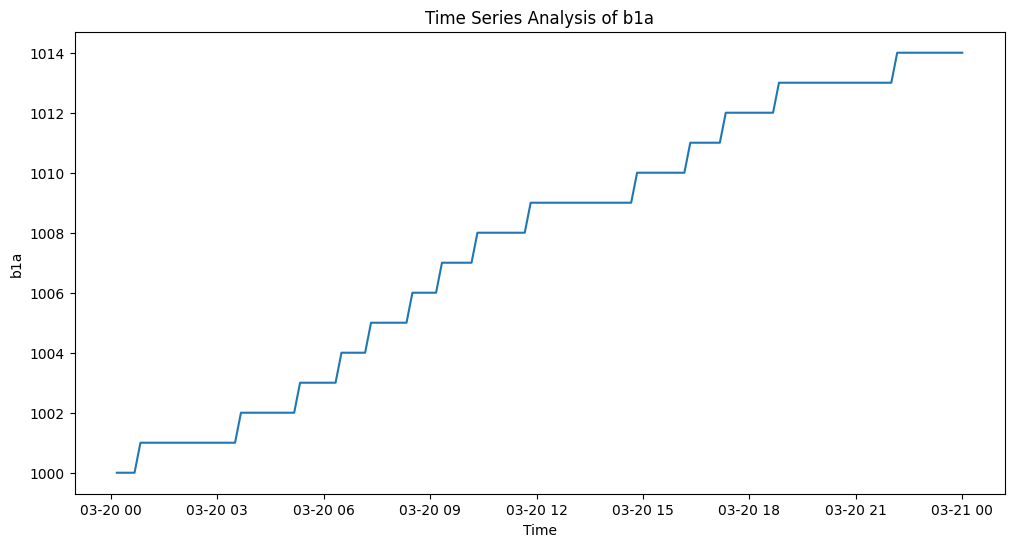

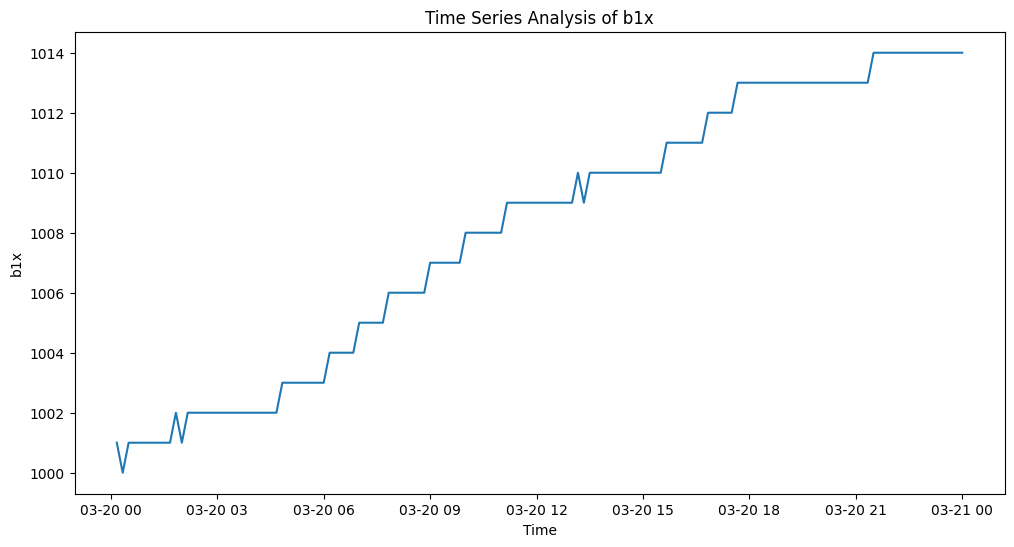

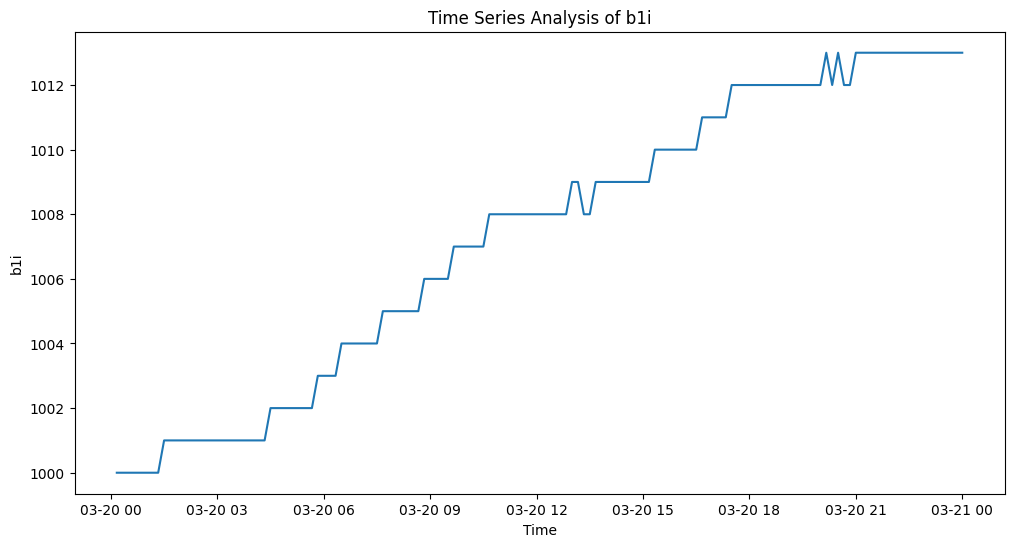

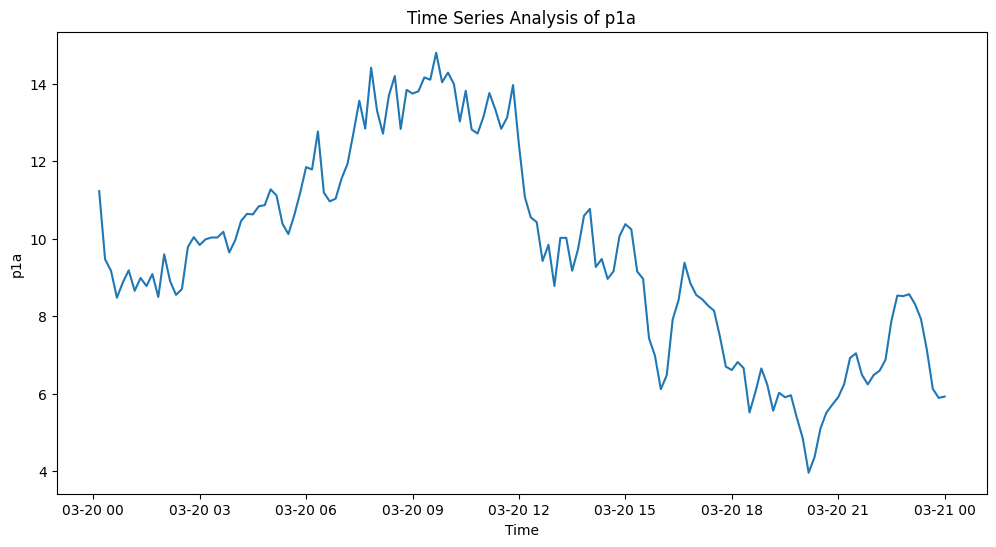

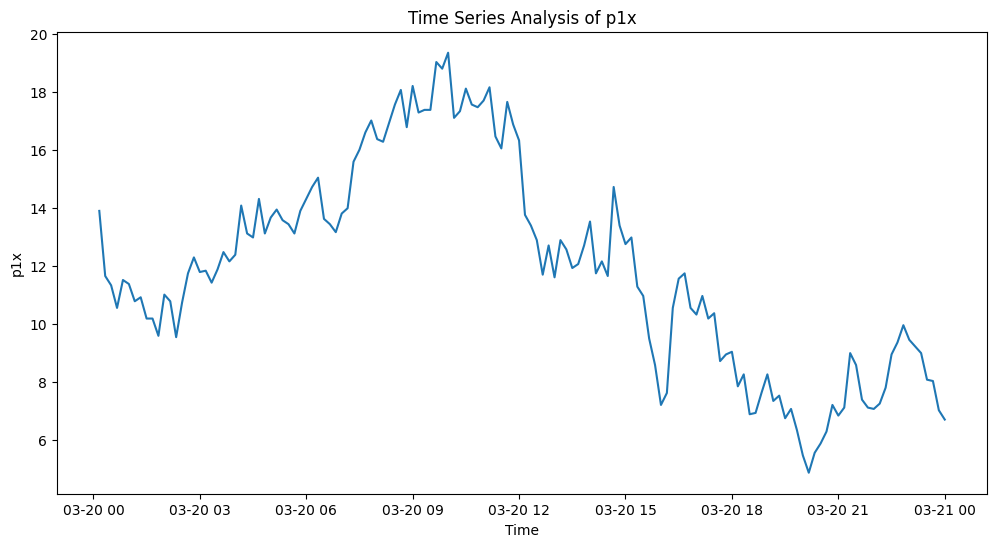

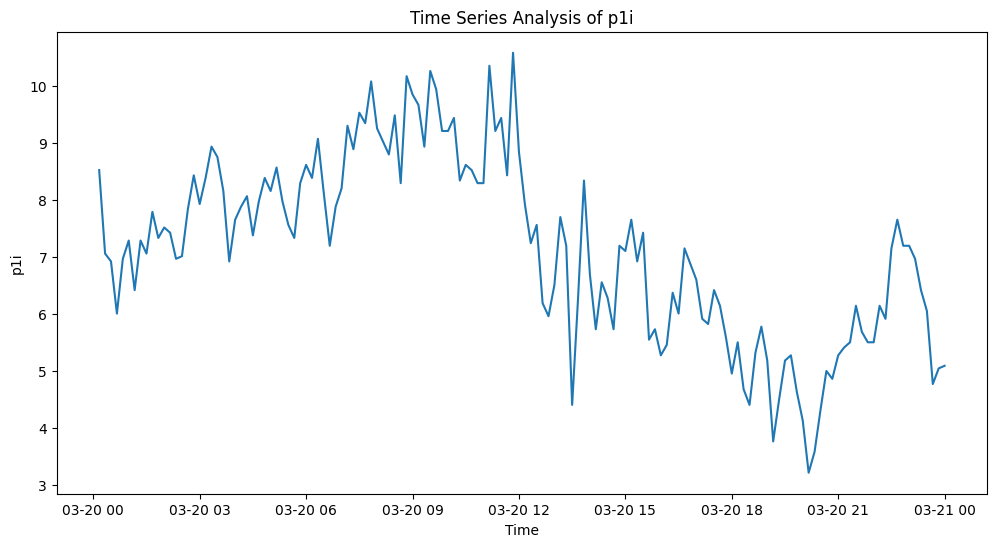

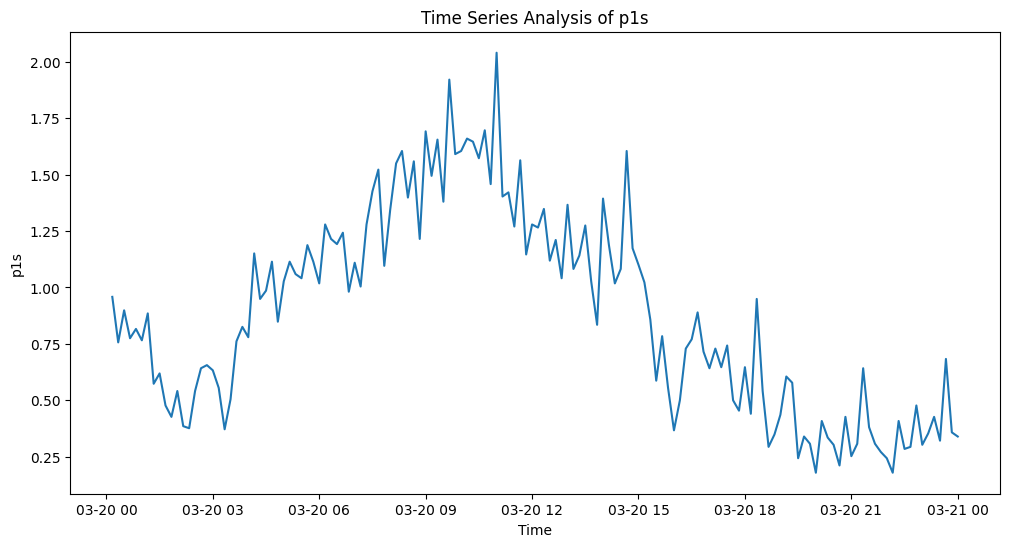

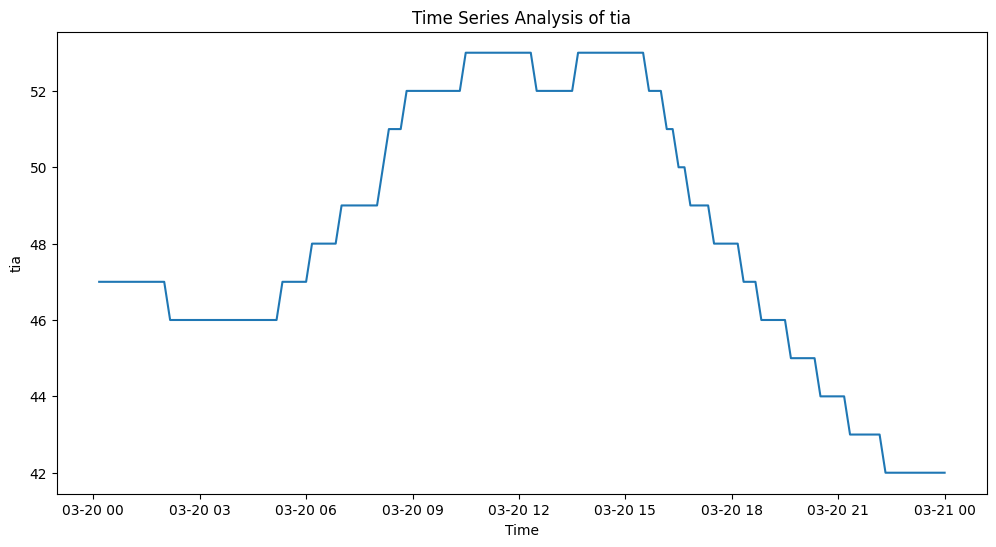

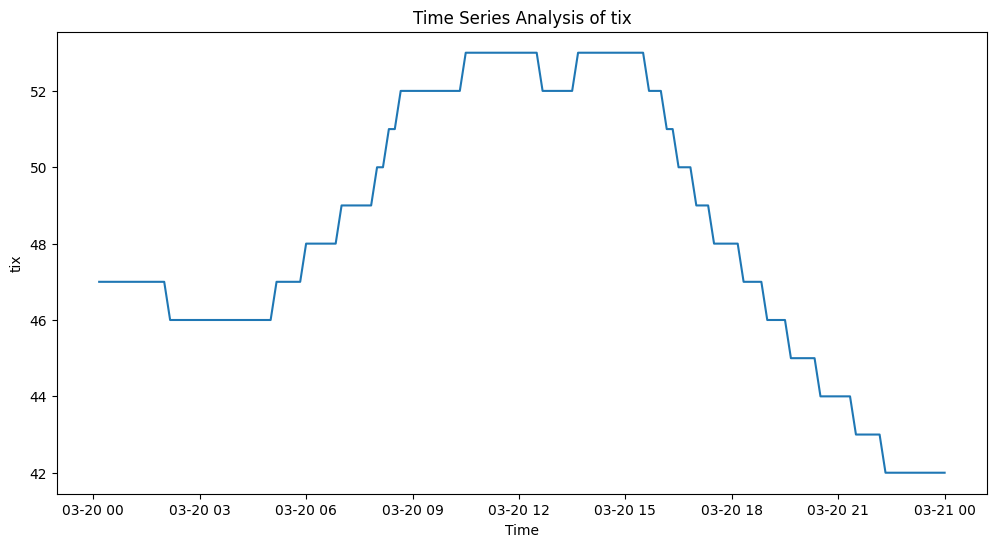

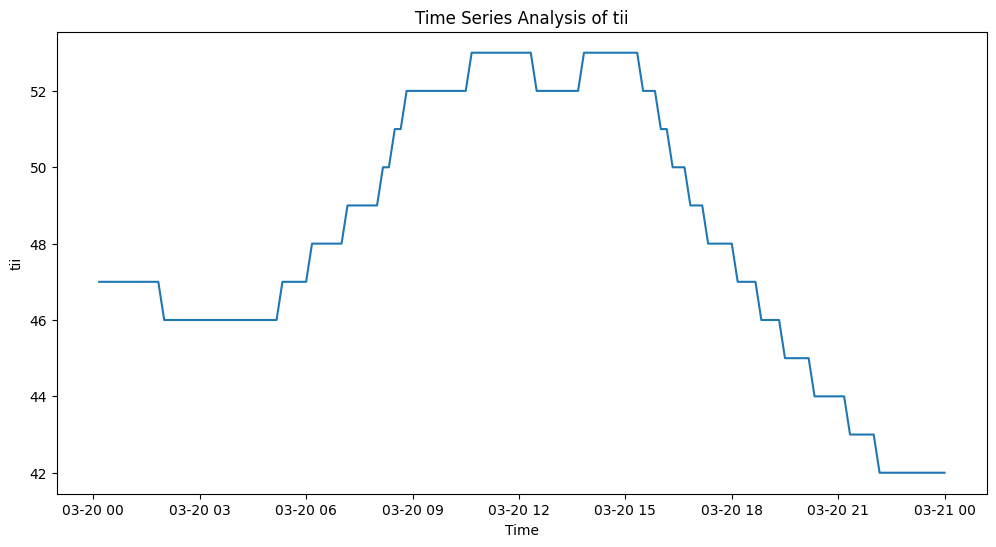

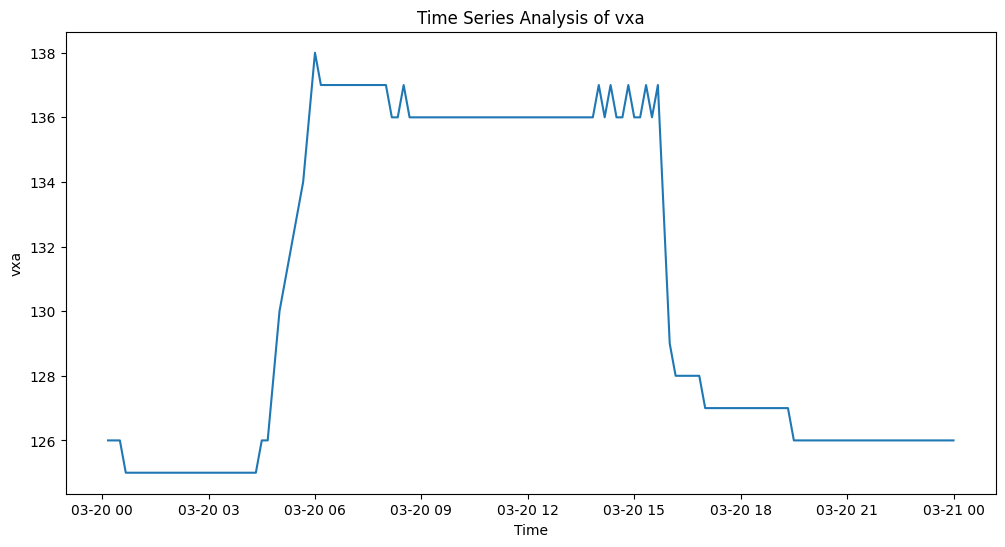

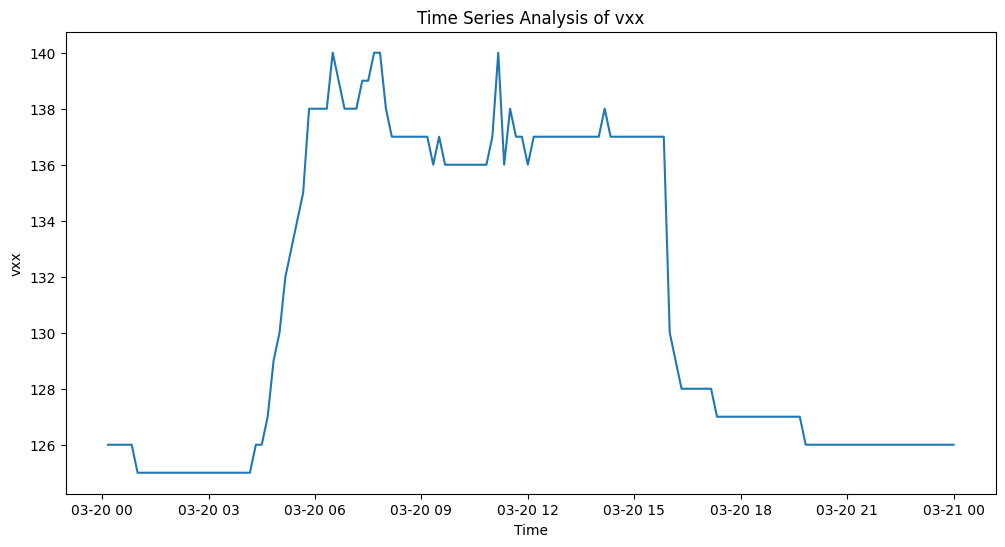

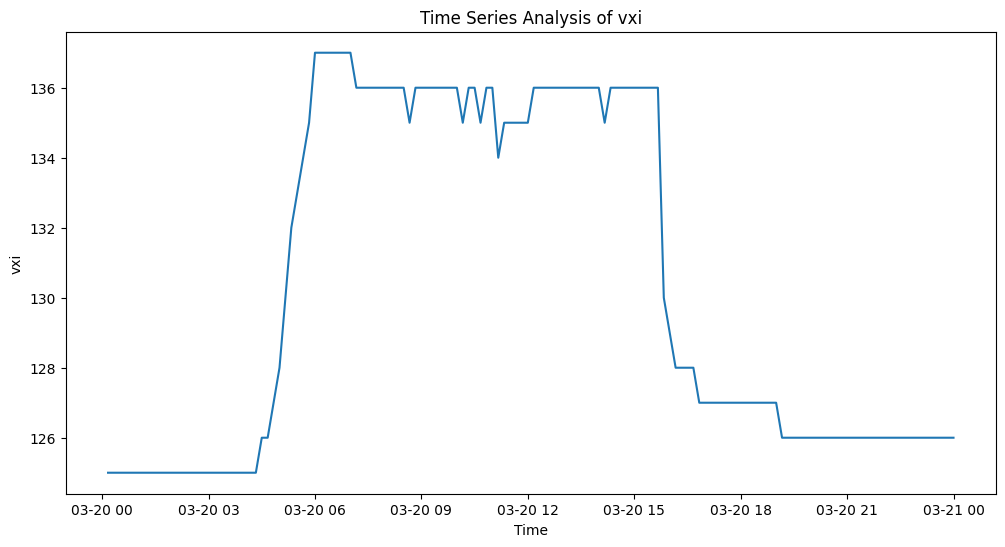

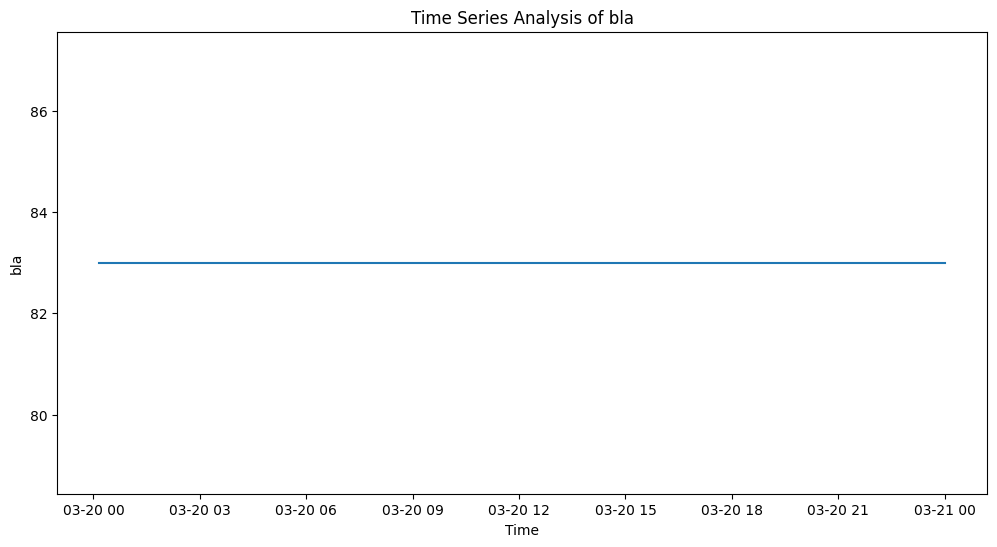

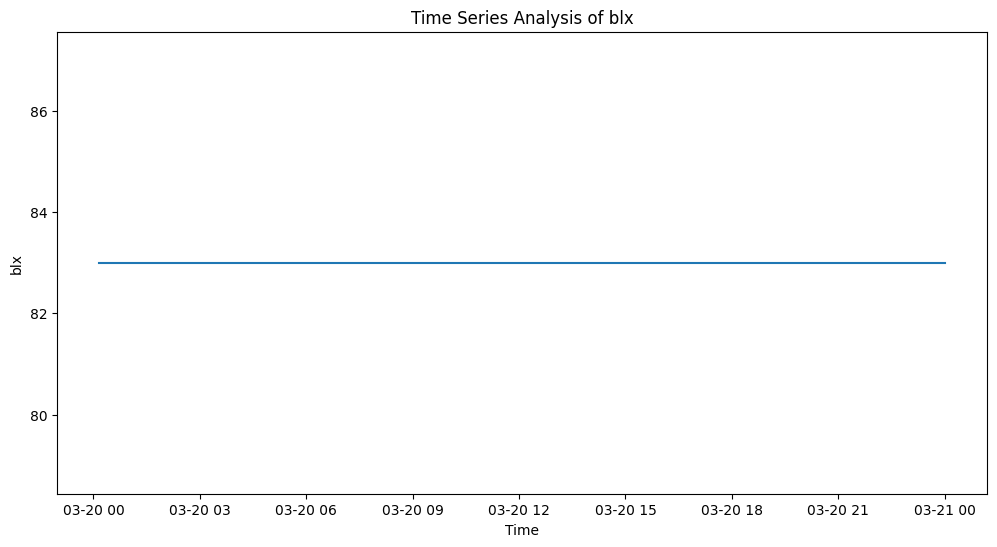

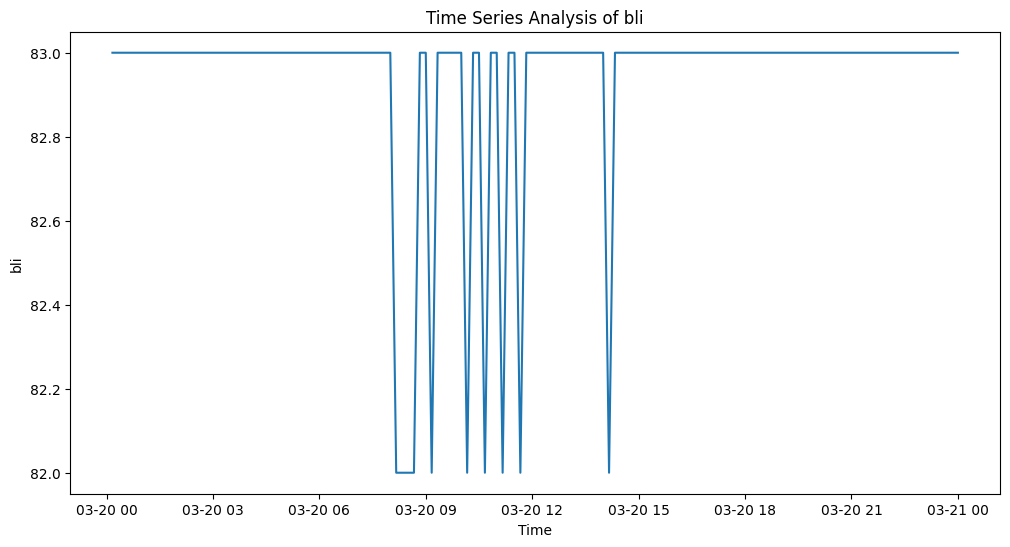

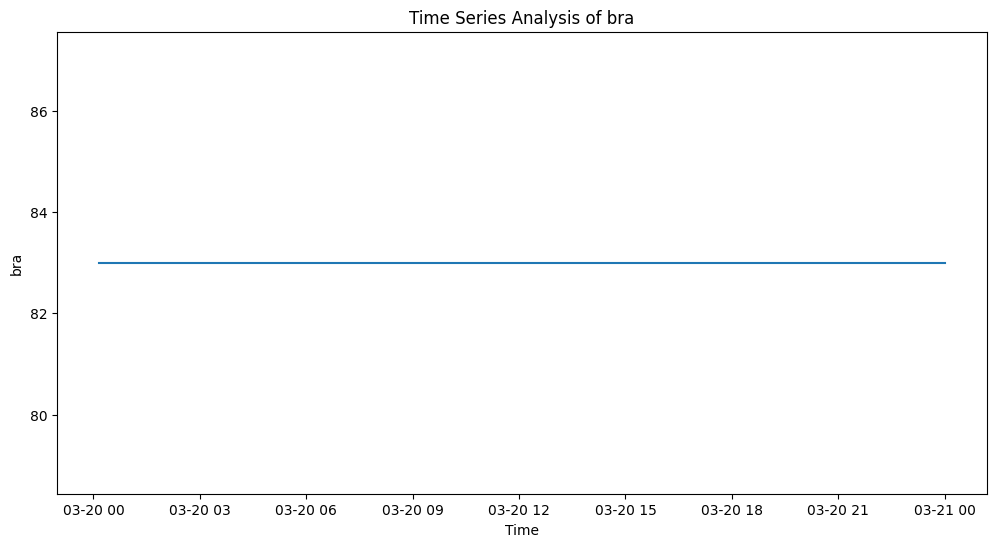

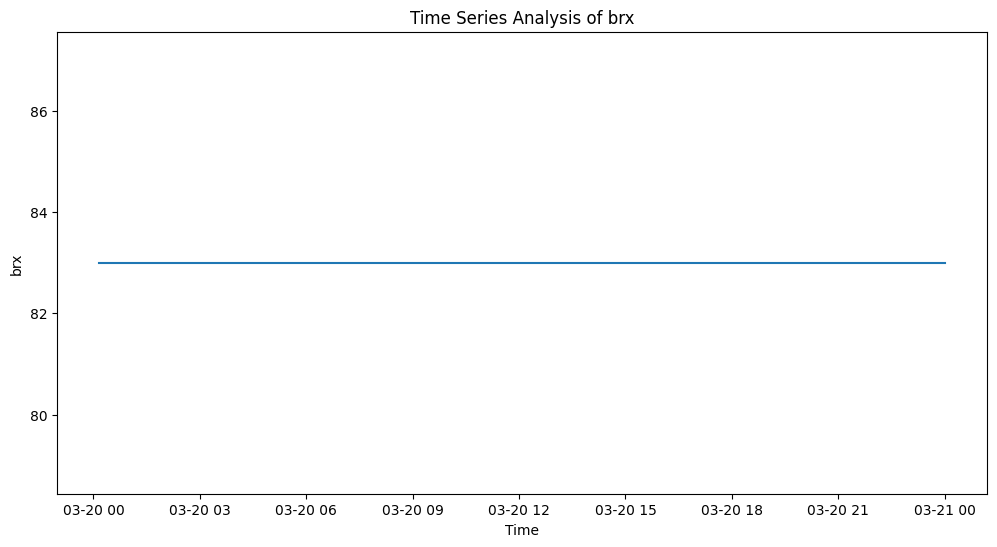

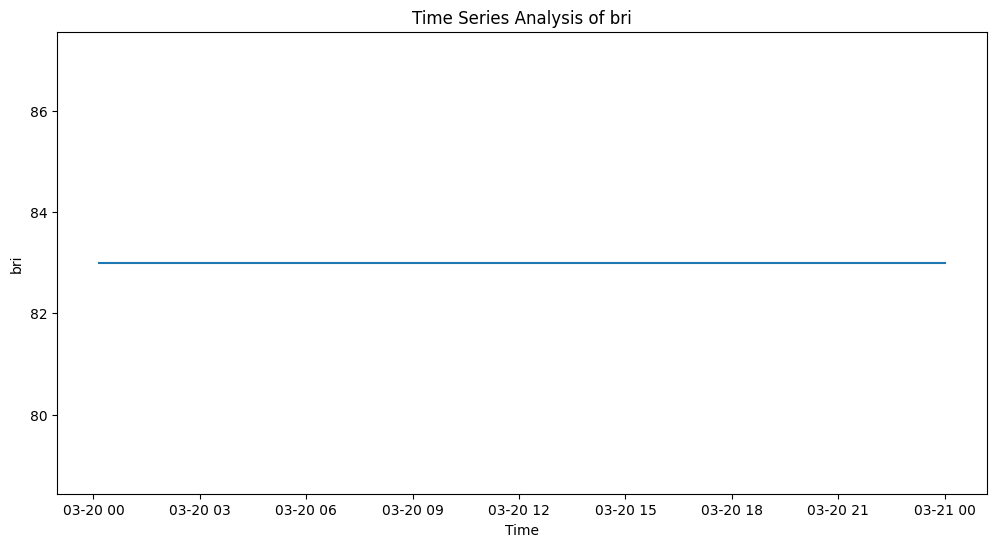

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

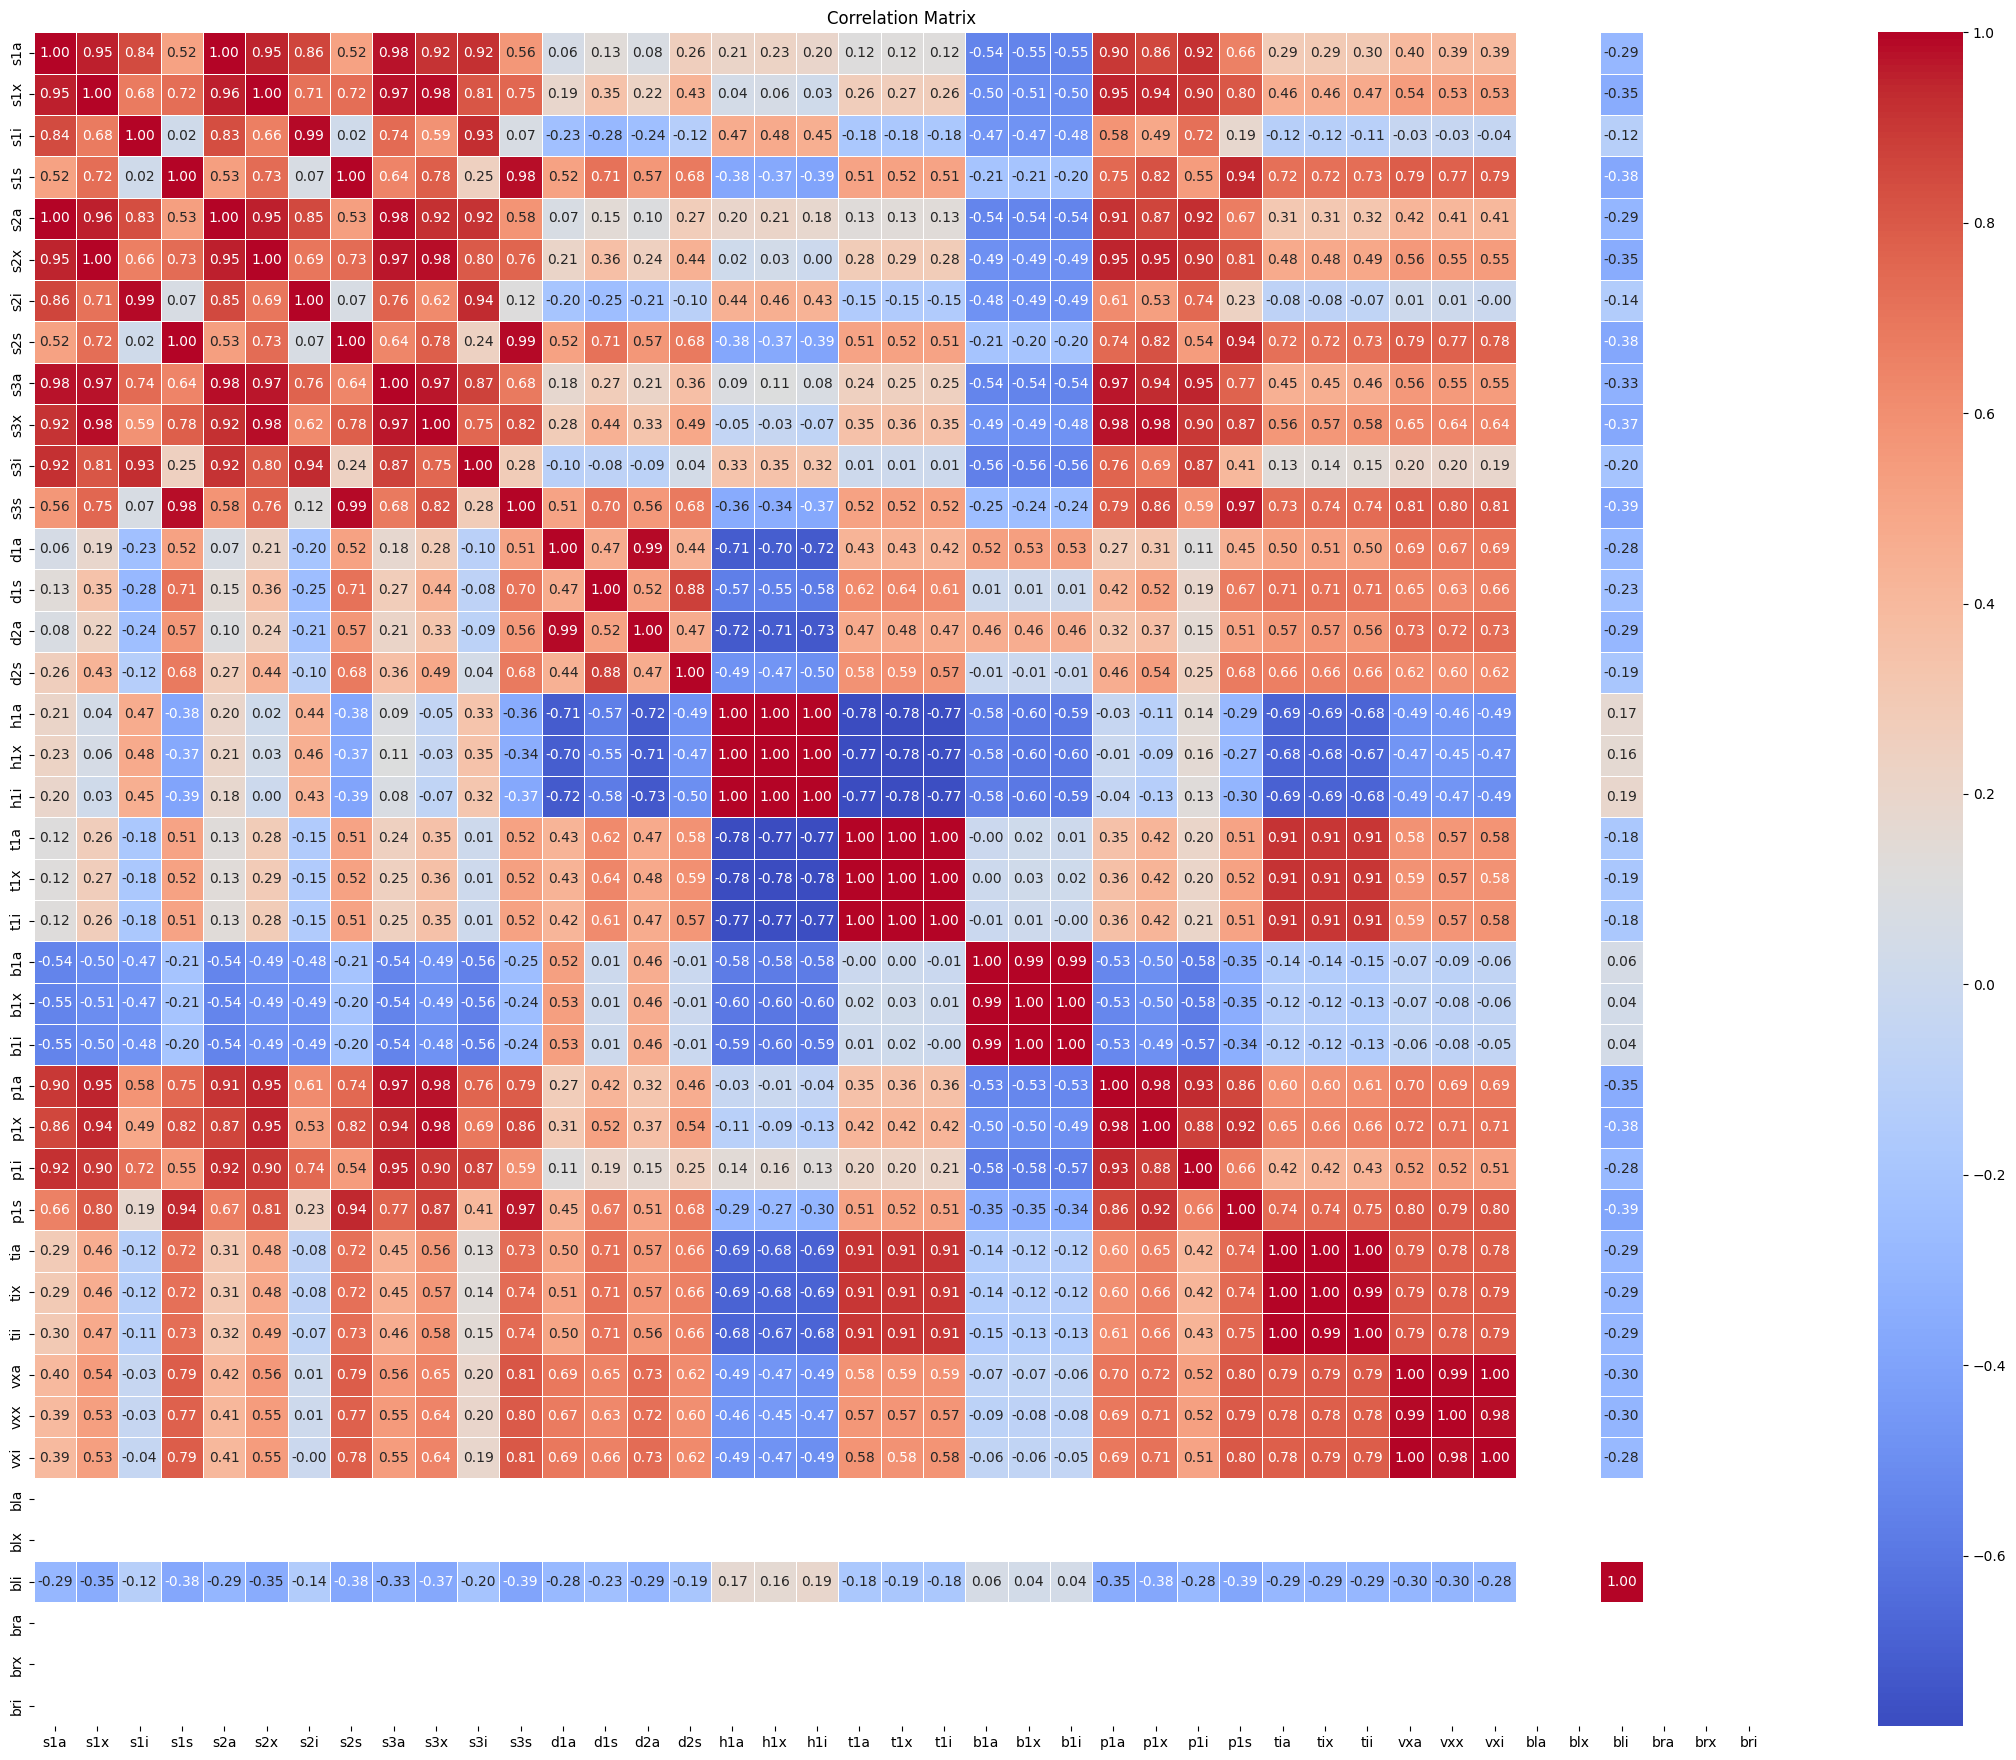

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

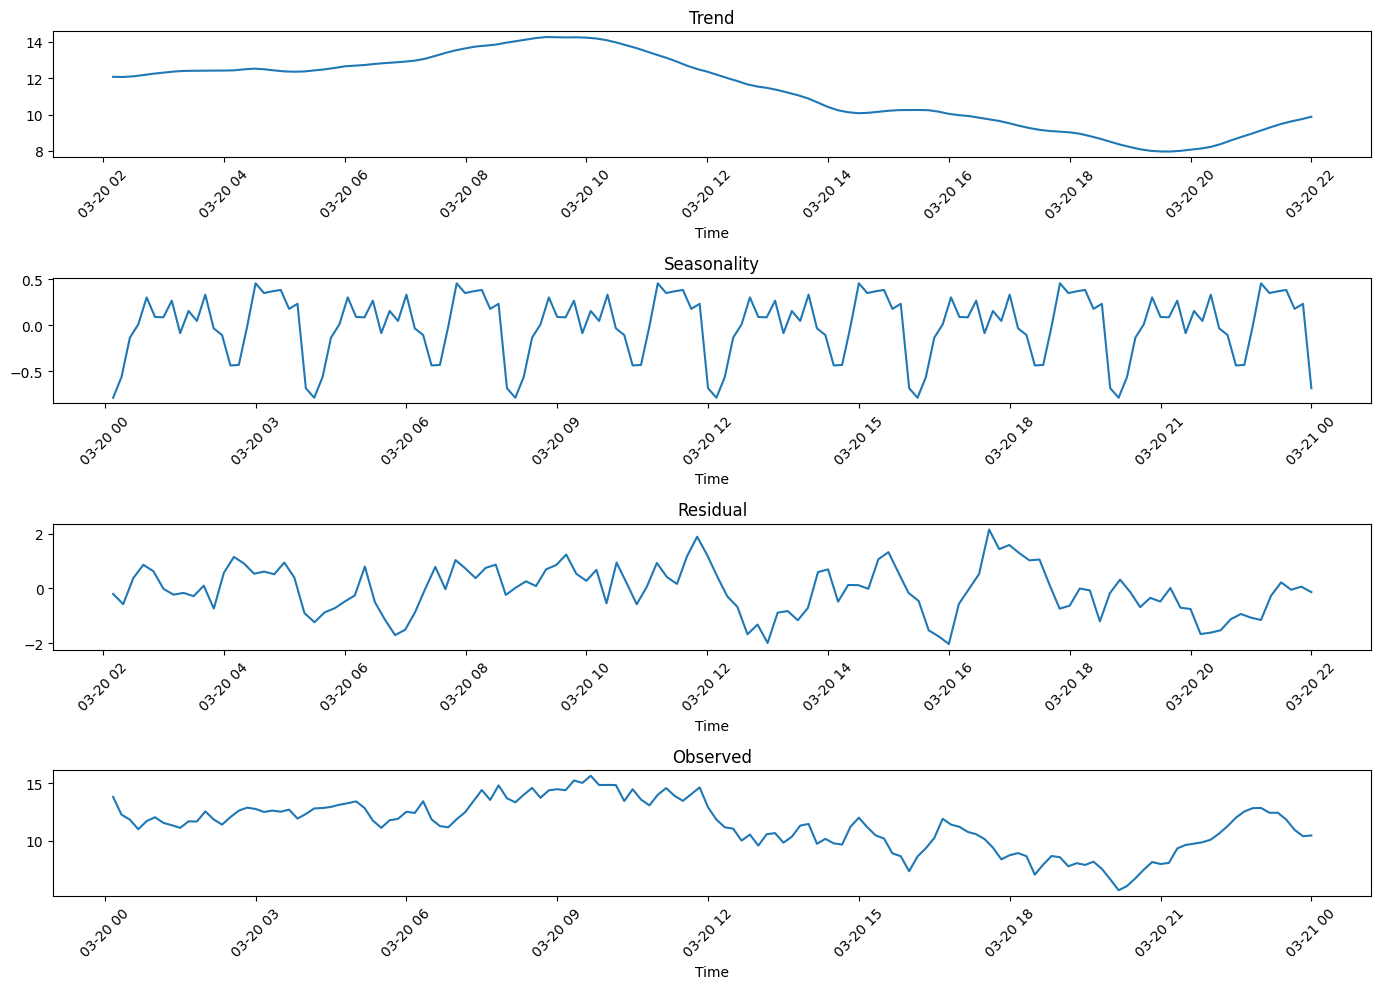

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


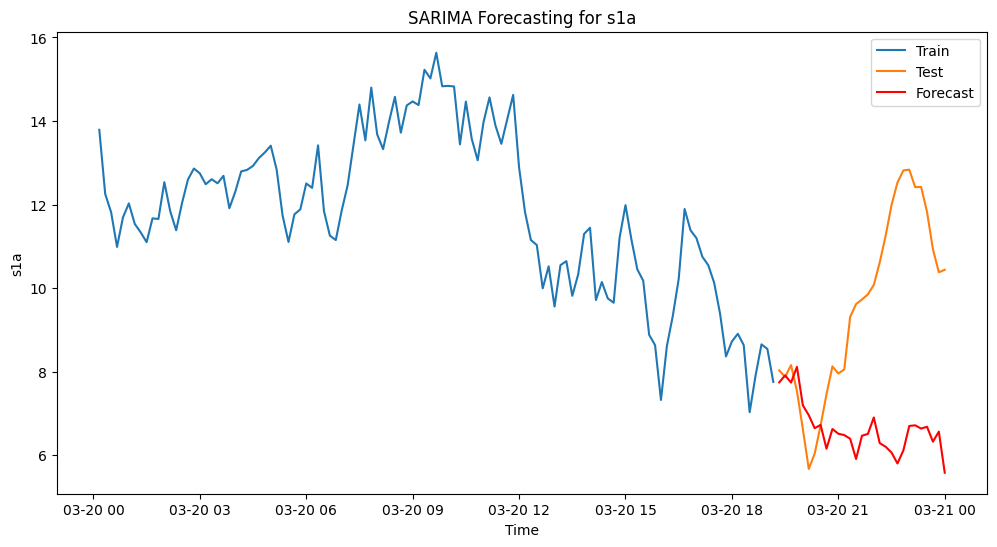

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()